# make folders for all to organize

# Exploratory Data Analysis

- Data collected manually for 36 days using YouTube API
    - scraped 10 most popular videos (according to Youtube Data API) from 5 countries each day
    - time of collection- 12:00am to 12:30am IST
- Overview of columns in data
    - `id` : video id 
    - `region_code` : country codes - [IN: India, US: USA, BR: Brazil, ID: Indonesia, MX: Mexico]	
    - `publish_date`: date the video was published	
    - `channel_id` : channel id for the channel that uploaded said video
    - `channel_name` : corresponding channel name
    - `title` : video title
    - `category_id` : video category id	
    - `duration` : duration of video	
    - `caption` : does video have captions	
    - `views` : views at time of collection	
    - `likes` : likes at time of collection	
    - `comment_count` : comments at time of collection


## 1. Data Overview

In [26]:
# importing required libraries

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# importing dataset
path = os.path.expanduser(r'~\OneDrive\Desktop\youtube_analysis_project\data\raw\\36days_youtube_videos.xlsx')
df = pd.read_excel(path)

df.head()

,id,region_code,publish_date,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count
0,XhW3i2f54BQ,IN,2025-02-24T05:37:32Z,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,1,PT1M45S,True,16695651,323858,6688
1,W8x6Dwyj0-A,IN,2025-02-22T11:30:08Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,10,PT2M58S,False,25780803,1588648,115750
2,dbWfo4NAx8M,IN,2025-02-23T17:12:10Z,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not DisappointedÂ atÂ All | #PAKVIND | Sh...,17,PT3M53S,False,2064436,83781,5386
3,DQnZhK6Y27g,IN,2025-02-23T06:11:52Z,UCebC4x5l2-PQxg46Ucv9CsA,Crazy XYZ,Crazy Secret Room Making Challenges Part-3 | à...,28,PT29M42S,False,4442627,300654,47471
4,UTaWdNZkGcM,IN,2025-02-23T17:21:39Z,UC9D7QzaNDP11e4jI4ygU5Xg,NewsBook,IND vs PAK: India à¤•à¥€ Pakistan à¤ªà¤° Virat...,17,PT11M48S,False,1374247,59617,3526


In [28]:
pd.set_option("display.float_format", "{:,.2f}".format) # for easier readibility of large number counts

In [29]:
df.shape

(1800, 12)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1788 non-null   object
 1   region_code    1800 non-null   object
 2   publish_date   1800 non-null   object
 3   channel_id     1800 non-null   object
 4   channel_name   1800 non-null   object
 5   title          1800 non-null   object
 6   category_id    1800 non-null   int64 
 7   duration       1800 non-null   object
 8   caption        1800 non-null   bool  
 9   views          1800 non-null   int64 
 10  likes          1800 non-null   int64 
 11  comment_count  1800 non-null   int64 
dtypes: bool(1), int64(4), object(7)
memory usage: 156.6+ KB


- only `id` has null values - 12 null

In [31]:
df.describe()

,category_id,views,likes,comment_count
count,"1,800.00","1,800.00","1,800.00","1,800.00"
mean,18.09,"2,601,915.56","108,559.56","7,245.53"
std,6.36,"5,123,641.46","206,360.40","14,909.21"
min,1.00,"20,125.00",0.00,0.00
25%,17.00,"401,314.25","13,287.25",845.00
50%,20.00,"930,178.50","38,145.50","2,413.50"
75%,24.00,"2,665,877.75","107,131.75","6,508.75"
max,28.00,"56,602,682.00","2,328,540.00","153,045.00"


- it is interesting to note that even the most popular videos according to youtube have 0 likes or comments


In [32]:
df[(df.likes == 0) | (df.comment_count == 0)].id.count()

np.int64(39)

- 40 most popular videos dont have any likes or comments

In [33]:
df.nunique()

id               1254
region_code         5
publish_date     1248
channel_id        851
channel_name      851
title            1265
category_id        14
duration          929
caption             2
views            1702
likes            1707
comment_count    1534
dtype: int64

- out of 1800 videos, 1254 videos are unique
- there are less unique ids than unique titles
    - this could be due to:
    - corruption in some titles if they are not in english
    - uploader changing the title after publishing

## Null Values

In [34]:
df[df['id'].isnull()]

,id,region_code,publish_date,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count
171,NaN,BR,2025-02-27T14:00:06Z,UCuo1V_VlMUOTjy89D1FDVDw,O Canal Oficial da PokÃ©mon em PortuguÃªs,[Brasil] PokÃ©mon Presents | 27.02.2025,20,PT19M16S,False,35316,0,557
232,NaN,ID,2025-02-28T09:06:47Z,UC5BMQOsAB8hKUyHu9KI6yig,KBS WORLD TV,[HOT DEBUT] The Chase - Hearts2Hearts ãƒãƒ¼ãƒ...,24,PT3M25S,False,751676,68072,3414
475,NaN,BR,2025-03-06T21:05:06Z,UCYC7HG92sGQjkcMrs8F4wBA,MUSSA GAME,W SUPREMO!! ELE VOLTOU MAIS FORTE!,24,PT11M56S,False,146359,7745,4602
624,NaN,BR,2025-03-09T23:08:39Z,UC_oToDrJ6uca7d1dFVBmLtg,Canal GOAT,CEARÃ X MARACANÃƒ | CAMPEONATO CEARENSE | AO ...,17,PT3H23M27S,False,561147,21580,6
964,NaN,US,2025-03-17T19:00:33Z,UC0biFgrMdkv1hFAFLVePODQ,Trixie Mattel,Who Is She?! with Caleb Hearon!,24,PT32M33S,False,549822,41760,2526
1306,NaN,IN,2025-03-24T12:35:01Z,UCw5N06QIrXBg92OfOVpvWkg,We Are One,Lala ka Birthday | Sukki Dc | We Are One,23,PT17M48S,False,298187,17117,810
1397,NaN,MX,2025-03-26T02:32:56Z,UC8EdTmyUaFIfZvVttJ9lgIA,ChilevisiÃ³n,CHILE 0-0 ECUADORðŸ† Clasificatorias Mundial ...,24,PT18M45S,False,312493,1892,961
1448,NaN,MX,2025-03-26T02:32:56Z,UC8EdTmyUaFIfZvVttJ9lgIA,ChilevisiÃ³n,CHILE 0-0 ECUADORðŸ† Clasificatorias Mundial ...,24,PT18M45S,False,449649,2351,1150
1490,NaN,MX,2025-03-28T00:00:06Z,UCncmmq2xV1002xNnx9_rDhw,MoratVEVO,"Morat, Camilo - Me Toca A MÃ­ (Video Oficial)",10,PT3M29S,True,608757,102091,5253
1543,NaN,MX,2025-03-28T00:00:06Z,UCncmmq2xV1002xNnx9_rDhw,MoratVEVO,"Morat, Camilo - Me Toca A MÃ­ (Video Oficial)",10,PT3M29S,True,1171528,123869,5707


- i decided to manually add these ids, from searching the videos on youtube and getting the ids

In [35]:
df.at[171, 'id'] = '-n-sxzh_mPk'
df.at[232, 'id'] = '-NYn3BkplZc'
df.at[475, 'id'] = '-WJZvt32838'
df.at[624, 'id'] = 'RKdfhv7ODCM'
df.at[964, 'id'] = '-oSXSqqgZVQ'
df.at[1306, 'id'] = '-ZdfyqKywsQ'
df.at[1397, 'id'] = '-a7f5tggqrA'
df.at[1448, 'id'] = '-a7f5tggqrA'
df.at[1490, 'id'] = '-vOgEO13FYA'
df.at[1543, 'id'] = '-vOgEO13FYA'
df.at[1612, 'id'] = '-u_2wzTaqxE'
df.at[1666, 'id'] = '-u_2wzTaqxE'


In [36]:
df[df['id'].isnull()]

,id,region_code,publish_date,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count


## 1. Pre Processing and Cleaning

In [37]:
# creating country column for easier readibilty
mapping = {'IN': 'India',
           'US': 'USA', 
           'BR': 'Brazil', 
           'ID': 'Indonesia', 
           'MX': 'Mexico'}

df['country'] = df['region_code'].map(mapping)

In [38]:
df = df.rename(columns={'publish_date' : 'publish_date_time'}) # renaming appropriately

In [39]:
# splitting date and time into two columns
df[['publish_date', 'publish_time']] = df['publish_date_time'].str.split('T', expand=True)
df['publish_time'] = df['publish_time'].str.rstrip('Z')

df.head()

,id,region_code,publish_date_time,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count,country,publish_date,publish_time
0,XhW3i2f54BQ,IN,2025-02-24T05:37:32Z,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,1,PT1M45S,True,16695651,323858,6688,India,2025-02-24,05:37:32
1,W8x6Dwyj0-A,IN,2025-02-22T11:30:08Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,10,PT2M58S,False,25780803,1588648,115750,India,2025-02-22,11:30:08
2,dbWfo4NAx8M,IN,2025-02-23T17:12:10Z,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not DisappointedÂ atÂ All | #PAKVIND | Sh...,17,PT3M53S,False,2064436,83781,5386,India,2025-02-23,17:12:10
3,DQnZhK6Y27g,IN,2025-02-23T06:11:52Z,UCebC4x5l2-PQxg46Ucv9CsA,Crazy XYZ,Crazy Secret Room Making Challenges Part-3 | à...,28,PT29M42S,False,4442627,300654,47471,India,2025-02-23,06:11:52
4,UTaWdNZkGcM,IN,2025-02-23T17:21:39Z,UC9D7QzaNDP11e4jI4ygU5Xg,NewsBook,IND vs PAK: India à¤•à¥€ Pakistan à¤ªà¤° Virat...,17,PT11M48S,False,1374247,59617,3526,India,2025-02-23,17:21:39


In [40]:
# convert to appropriate data types
df['publish_date_time'] = pd.to_datetime(df['publish_date_time'], utc=True, errors='coerce') 

df['duration_in_min'] = pd.to_timedelta(df['duration'], errors='coerce').dt.total_seconds() #duration in seconds
df['duration_in_min'] = (df['duration_in_min']/60.00).round(2) #duration in minutes

df.dtypes

id                                object
region_code                       object
publish_date_time    datetime64[ns, UTC]
channel_id                        object
channel_name                      object
title                             object
category_id                        int64
duration                          object
caption                             bool
views                              int64
likes                              int64
comment_count                      int64
country                           object
publish_date                      object
publish_time                      object
duration_in_min                  float64
dtype: object

In [41]:
df.head()

,id,region_code,publish_date_time,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count,country,publish_date,publish_time,duration_in_min
0,XhW3i2f54BQ,IN,2025-02-24 05:37:32+00:00,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,1,PT1M45S,True,16695651,323858,6688,India,2025-02-24,05:37:32,1.75
1,W8x6Dwyj0-A,IN,2025-02-22 11:30:08+00:00,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,10,PT2M58S,False,25780803,1588648,115750,India,2025-02-22,11:30:08,2.97
2,dbWfo4NAx8M,IN,2025-02-23 17:12:10+00:00,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not DisappointedÂ atÂ All | #PAKVIND | Sh...,17,PT3M53S,False,2064436,83781,5386,India,2025-02-23,17:12:10,3.88
3,DQnZhK6Y27g,IN,2025-02-23 06:11:52+00:00,UCebC4x5l2-PQxg46Ucv9CsA,Crazy XYZ,Crazy Secret Room Making Challenges Part-3 | à...,28,PT29M42S,False,4442627,300654,47471,India,2025-02-23,06:11:52,29.70
4,UTaWdNZkGcM,IN,2025-02-23 17:21:39+00:00,UC9D7QzaNDP11e4jI4ygU5Xg,NewsBook,IND vs PAK: India à¤•à¥€ Pakistan à¤ªà¤° Virat...,17,PT11M48S,False,1374247,59617,3526,India,2025-02-23,17:21:39,11.80


In [42]:
""""Getting categories for all regions using Youtube Data API"""

# from mypackage import get_youtube_object

# youtube = get_youtube_object()

# categories = {}
# for region in ['IN', 'US', 'BR', 'ID', 'MX']:
#     request = youtube.videoCategories().list(
#             part="snippet",
#             regionCode='IN'
#         )
#     response = request.execute()
#     tmp_dict = {}
#     for i in range(len(response['items'])):
#         tmp_dict[response['items'][i]['id']] = response['items'][i]['snippet']['title']
#     categories[region] = tmp_dict

# print(categories)


'"Getting categories for all regions using Youtube Data API'

In [43]:
# categories = {'IN': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}, 
#               'US': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}, 
#               'BR': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}, 
#               'ID': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}, 
#               'MX': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}}

- since there is no difference between categories of these 5 regions we can simply use one dict

In [44]:
categories = {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}

In [45]:
df['category'] = df['category_id'].apply(lambda x: categories[str(x)] if str(x) in categories.keys() else 'NaN')

df.head()

,id,region_code,publish_date_time,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count,country,publish_date,publish_time,duration_in_min,category
0,XhW3i2f54BQ,IN,2025-02-24 05:37:32+00:00,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,1,PT1M45S,True,16695651,323858,6688,India,2025-02-24,05:37:32,1.75,Film & Animation
1,W8x6Dwyj0-A,IN,2025-02-22 11:30:08+00:00,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,10,PT2M58S,False,25780803,1588648,115750,India,2025-02-22,11:30:08,2.97,Music
2,dbWfo4NAx8M,IN,2025-02-23 17:12:10+00:00,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not DisappointedÂ atÂ All | #PAKVIND | Sh...,17,PT3M53S,False,2064436,83781,5386,India,2025-02-23,17:12:10,3.88,Sports
3,DQnZhK6Y27g,IN,2025-02-23 06:11:52+00:00,UCebC4x5l2-PQxg46Ucv9CsA,Crazy XYZ,Crazy Secret Room Making Challenges Part-3 | à...,28,PT29M42S,False,4442627,300654,47471,India,2025-02-23,06:11:52,29.70,Science & Technology
4,UTaWdNZkGcM,IN,2025-02-23 17:21:39+00:00,UC9D7QzaNDP11e4jI4ygU5Xg,NewsBook,IND vs PAK: India à¤•à¥€ Pakistan à¤ªà¤° Virat...,17,PT11M48S,False,1374247,59617,3526,India,2025-02-23,17:21:39,11.80,Sports


In [46]:
# checking for missing categories
df[df['category'] == 'Nan']

,id,region_code,publish_date_time,channel_id,channel_name,title,category_id,duration,caption,views,likes,comment_count,country,publish_date,publish_time,duration_in_min,category


In [47]:
# drop category id column
df = df.drop(columns='category_id')

## 2. EDA

In [48]:
# checking range of dates in dataset
print(f"Starting date: {df.publish_date_time.dt.date.min()}")
print(f"Ending date: {df.publish_date_time.dt.date.max()}")

df.publish_date_time.max() - df.publish_date_time.min()

Starting date: 2025-02-19
Ending date: 2025-04-03


Timedelta('42 days 17:47:11')

- since data contains content for 36 videos, there are 6 days missing

In [49]:
df.head(3)

,id,region_code,publish_date_time,channel_id,channel_name,title,duration,caption,views,likes,comment_count,country,publish_date,publish_time,duration_in_min,category
0,XhW3i2f54BQ,IN,2025-02-24 05:37:32+00:00,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,PT1M45S,True,16695651,323858,6688,India,2025-02-24,05:37:32,1.75,Film & Animation
1,W8x6Dwyj0-A,IN,2025-02-22 11:30:08+00:00,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,PT2M58S,False,25780803,1588648,115750,India,2025-02-22,11:30:08,2.97,Music
2,dbWfo4NAx8M,IN,2025-02-23 17:12:10+00:00,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not DisappointedÂ atÂ All | #PAKVIND | Sh...,PT3M53S,False,2064436,83781,5386,India,2025-02-23,17:12:10,3.88,Sports


In [50]:
df.dtypes

id                                object
region_code                       object
publish_date_time    datetime64[ns, UTC]
channel_id                        object
channel_name                      object
title                             object
duration                          object
caption                             bool
views                              int64
likes                              int64
comment_count                      int64
country                           object
publish_date                      object
publish_time                      object
duration_in_min                  float64
category                          object
dtype: object

- the data doesnt have dates on which data was collected
- making the column manually:

In [51]:
df['group'] = (df.index // 50) # since each day 50 videos are collected

df['collected_date'] = df.groupby('group')['publish_date_time'].transform('max') # group by each day to get maximum date

df['collected_date'] = df['collected_date'].dt.normalize() # time set to 12am keeping dates same

In [52]:
df[['collected_date', 'group', 'region_code' ]]

,collected_date,group,region_code
0,2025-02-24 00:00:00+00:00,0,IN
1,2025-02-24 00:00:00+00:00,0,IN
2,2025-02-24 00:00:00+00:00,0,IN
3,2025-02-24 00:00:00+00:00,0,IN
4,2025-02-24 00:00:00+00:00,0,IN
...,...,...,...
1795,2025-04-03 00:00:00+00:00,35,MX
1796,2025-04-03 00:00:00+00:00,35,MX
1797,2025-04-03 00:00:00+00:00,35,MX
1798,2025-04-03 00:00:00+00:00,35,MX


In [53]:
df = df.drop(columns='group')

In [54]:
df['collected_date'].unique()

<DatetimeArray>
['2025-02-24 00:00:00+00:00', '2025-02-25 00:00:00+00:00',
 '2025-02-26 00:00:00+00:00', '2025-02-27 00:00:00+00:00',
 '2025-03-01 00:00:00+00:00', '2025-03-02 00:00:00+00:00',
 '2025-03-04 00:00:00+00:00', '2025-03-05 00:00:00+00:00',
 '2025-03-06 00:00:00+00:00', '2025-03-07 00:00:00+00:00',
 '2025-03-08 00:00:00+00:00', '2025-03-09 00:00:00+00:00',
 '2025-03-10 00:00:00+00:00', '2025-03-11 00:00:00+00:00',
 '2025-03-12 00:00:00+00:00', '2025-03-14 00:00:00+00:00',
 '2025-03-15 00:00:00+00:00', '2025-03-16 00:00:00+00:00',
 '2025-03-17 00:00:00+00:00', '2025-03-18 00:00:00+00:00',
 '2025-03-19 00:00:00+00:00', '2025-03-20 00:00:00+00:00',
 '2025-03-21 00:00:00+00:00', '2025-03-22 00:00:00+00:00',
 '2025-03-23 00:00:00+00:00', '2025-03-24 00:00:00+00:00',
 '2025-03-25 00:00:00+00:00', '2025-03-26 00:00:00+00:00',
 '2025-03-27 00:00:00+00:00', '2025-03-28 00:00:00+00:00',
 '2025-03-29 00:00:00+00:00', '2025-03-30 00:00:00+00:00',
 '2025-03-31 00:00:00+00:00', '2025-04-0

- since there are 36 unique values, and we also have data for 36 days the dates collected are valid

In [55]:
# sifting the columns
categorical = ['title', 'channel_name', 'category', 'caption', 'collected_date', 'publish_date', 'publish_time']
numerical = ['duration_in_min', 'views', 'likes', 'comment_count']
datetime = 'publish_date_time'

### 2.1 Univariate Analysis

In [56]:
df.head(1)

,id,region_code,publish_date_time,channel_id,channel_name,title,duration,caption,views,likes,comment_count,country,publish_date,publish_time,duration_in_min,category,collected_date
0,XhW3i2f54BQ,IN,2025-02-24 05:37:32+00:00,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,PT1M45S,True,16695651,323858,6688,India,2025-02-24,05:37:32,1.75,Film & Animation,2025-02-24 00:00:00+00:00


#### 2.1.1 Categorical Columns

In [57]:
def categorical_univariate(df, col, hue):
    if df[col].nunique() < 30: # make plot only if unique values dont go beyond 50
        print('Column: ' + col)
        _, axes = plt.subplots(1, 2, figsize=(12, 6))
        sns.countplot(data=df, y=col, ax=axes[0])
        axes[0].set_title(f'Bar plot of {col}', fontsize=12)

        sns.countplot(data=df, y=col, hue=hue, ax=axes[1])
        axes[1].set_title(f'Bar plot of {col} with {hue}', fontsize=12)

        plt.tight_layout()
        plt.show()
        
    print(df[col].value_counts())
    print('-------------------------------------' + '\n')


title
j-hope â€˜Sweet Dreams (feat. Miguel)â€™ Official MV                       9
JENNIE - like JENNIE (Official Video)                                      9
j-hope â€˜MONA LISAâ€™ Official MV                                         7
Race Highlights | 2025 Australian Grand Prix                               7
Cazzu - CON OTRA (Official Video)                                          7
                                                                          ..
I Pranked Everyone on April Fools Day                                      1
Tales of the Underworld | Official Trailer | Available May 4 on Disney+    1
SOUTH KOREA IS OVER                                                        1
Minecraft but I discover the AXES of PVP CIVILIZATION                      1
[HINDI] realme BGIS 2025 | SEMI FINALS - WEEK 01 | Day 4                   1
Name: count, Length: 1265, dtype: int64
-------------------------------------

channel_name
HYBE LABELS                22
FORMULA 1                

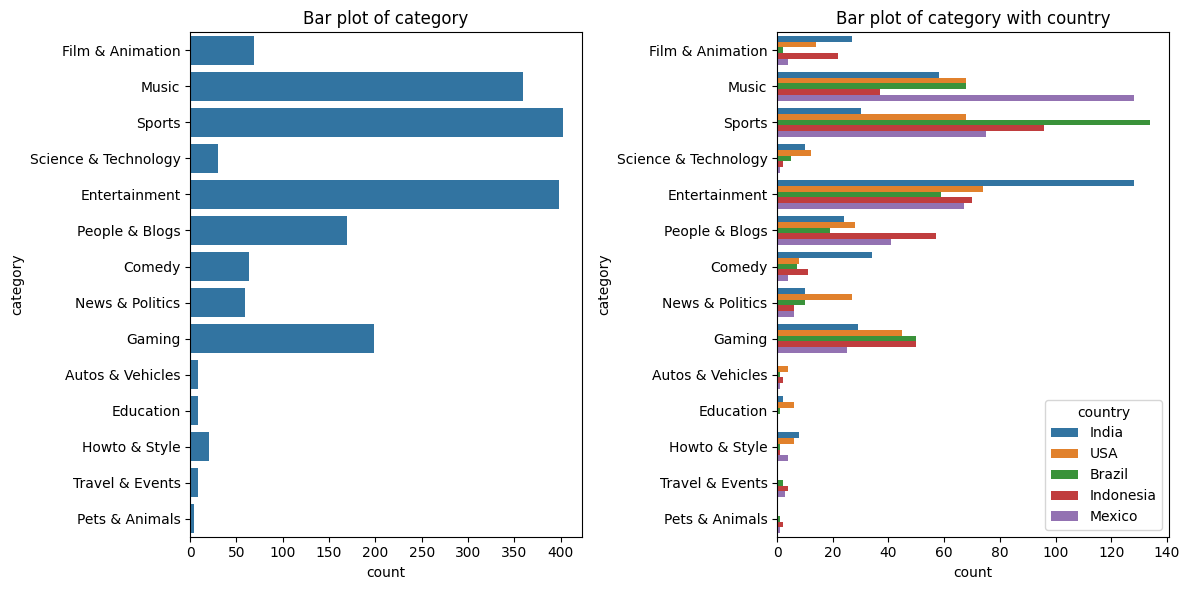

category
Sports                  403
Entertainment           398
Music                   359
Gaming                  199
People & Blogs          169
Film & Animation         69
Comedy                   64
News & Politics          59
Science & Technology     30
Howto & Style            20
Travel & Events           9
Education                 9
Autos & Vehicles          8
Pets & Animals            4
Name: count, dtype: int64
-------------------------------------

Column: caption


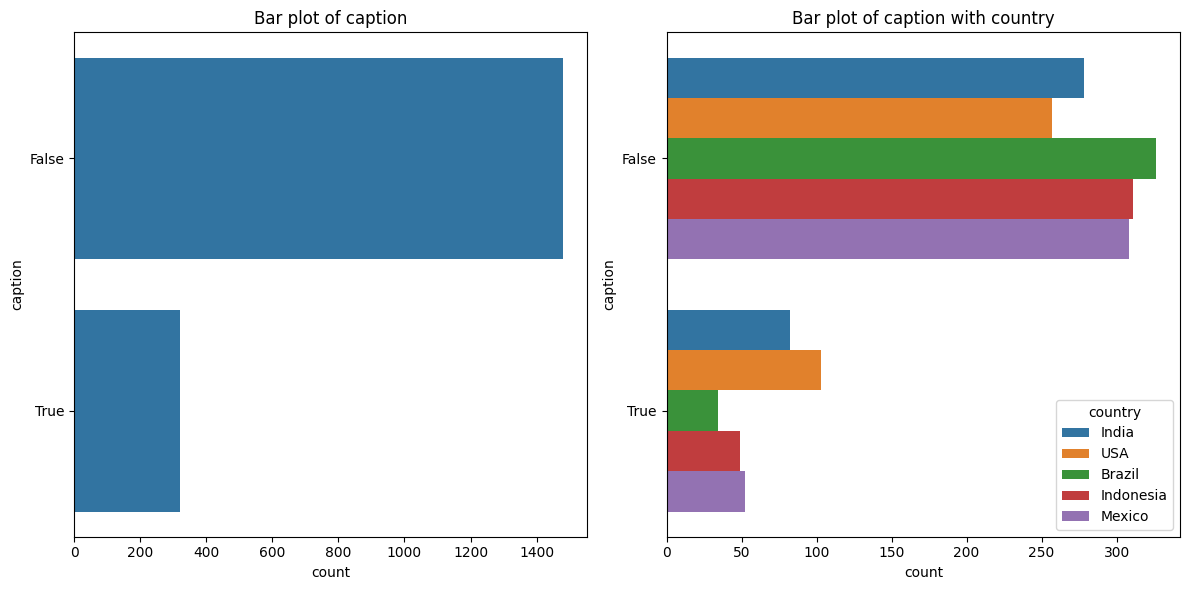

caption
False    1480
True      320
Name: count, dtype: int64
-------------------------------------

collected_date
2025-02-24 00:00:00+00:00    50
2025-02-25 00:00:00+00:00    50
2025-02-26 00:00:00+00:00    50
2025-02-27 00:00:00+00:00    50
2025-03-01 00:00:00+00:00    50
2025-03-02 00:00:00+00:00    50
2025-03-04 00:00:00+00:00    50
2025-03-05 00:00:00+00:00    50
2025-03-06 00:00:00+00:00    50
2025-03-07 00:00:00+00:00    50
2025-03-08 00:00:00+00:00    50
2025-03-09 00:00:00+00:00    50
2025-03-10 00:00:00+00:00    50
2025-03-11 00:00:00+00:00    50
2025-03-12 00:00:00+00:00    50
2025-03-14 00:00:00+00:00    50
2025-03-15 00:00:00+00:00    50
2025-03-16 00:00:00+00:00    50
2025-03-17 00:00:00+00:00    50
2025-03-18 00:00:00+00:00    50
2025-03-19 00:00:00+00:00    50
2025-03-20 00:00:00+00:00    50
2025-03-21 00:00:00+00:00    50
2025-03-22 00:00:00+00:00    50
2025-03-23 00:00:00+00:00    50
2025-03-24 00:00:00+00:00    50
2025-03-25 00:00:00+00:00    50
2025-03-26 00:00:00+

In [58]:
for col in categorical:
    categorical_univariate(df, col, 'country')

##### Insights

- _Sports_ is the most popular category
    - it is followed closely by _Entertainment_ and _Music_  

- Most of the _Sports_ videos are popular in _Brazil_
- Most of the _Entertainment_ videos are popular in _India_
- Most of the _Music_ videos are popular in _Mexico_
- Most of the _Comedy_ videos are popular in _India_

- Out of top 5 videos, 3 are K-pop music videos

In [59]:
df[['title']].value_counts().head(10)

title                                                                                         
j-hope â€˜Sweet Dreams (feat. Miguel)â€™ Official MV                                              9
JENNIE - like JENNIE (Official Video)                                                             9
j-hope â€˜MONA LISAâ€™ Official MV                                                                7
Cazzu - CON OTRA (Official Video)                                                                 7
Race Highlights | 2025 Australian Grand Prix                                                      7
G-DRAGON - TOO BAD (feat. Anderson .Paak) (Official Video)                                        6
HIGHLIGHTS | FC BARCELONA 4 vs 4 ATLETICO MADRID | COPA DEL REY 24/25 (WITH COMMENTARY)           6
JENNIE & Dua Lipa - Handlebars (Official Video)                                                   6
Rari - Peso Pluma (Video Oficial)                                                                 5
HIT 3

In [60]:
df['channel_name'].value_counts().head(10)

channel_name
HYBE LABELS           22
FORMULA 1             18
Canal GOAT            17
JennieRubyJaneVEVO    15
Vijay Television      15
CazÃ©TV               14
Dhot Design           14
RCTI Sports           13
Colors Cineplex       12
T-Series Tamil        12
Name: count, dtype: int64

#### 2.1.2 Numerical Columns

- since many videos are repeated, they are likely to skew the numerical columns
- hence, we will only take the last instance of each video
- this will show the stats of the popular videos after 36 days

In [61]:
df_latest = df.drop_duplicates(subset='id', keep='last').reset_index()

df_latest.describe()

,index,views,likes,comment_count,duration_in_min
count,"1,263.00","1,263.00","1,263.00","1,263.00","1,263.00"
mean,893.91,"1,971,719.17","72,921.90","4,910.22",31.32
std,525.22,"4,106,225.95","144,835.20","10,287.67",71.72
min,4.00,"20,125.00",0.00,0.00,0.28
25%,431.00,"316,638.00","10,743.50",696.50,3.99
50%,874.00,"740,444.00","28,666.00","1,866.00",12.53
75%,"1,345.50","1,929,988.50","78,721.50","4,722.50",24.85
max,"1,799.00","56,602,682.00","2,328,540.00","153,045.00",715.00


In [62]:
def numerical_univariate(df, col, hue):
    nbins = 20
    print(col)

# histogram without hue
    sns.histplot(data=df, x=col, kde=True, bins=nbins)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.tight_layout()
    plt.show()
    
# boxplots with and without hue
    _, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.boxplot(data=df, x=col, ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}', fontsize=12)

    sns.boxplot(data=df, x=col, hue=hue, ax=axes[1])
    axes[1].set_title(f'Boxplot of {col} with {hue}', fontsize=12)
    
    plt.tight_layout()
    plt.show()

    print('----------------------------------- \n')

duration_in_min


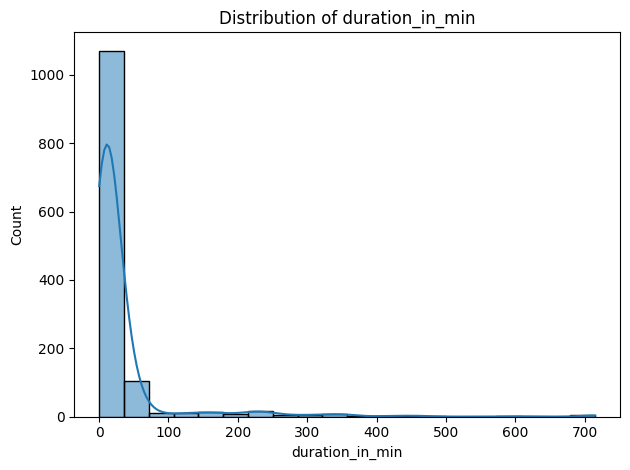

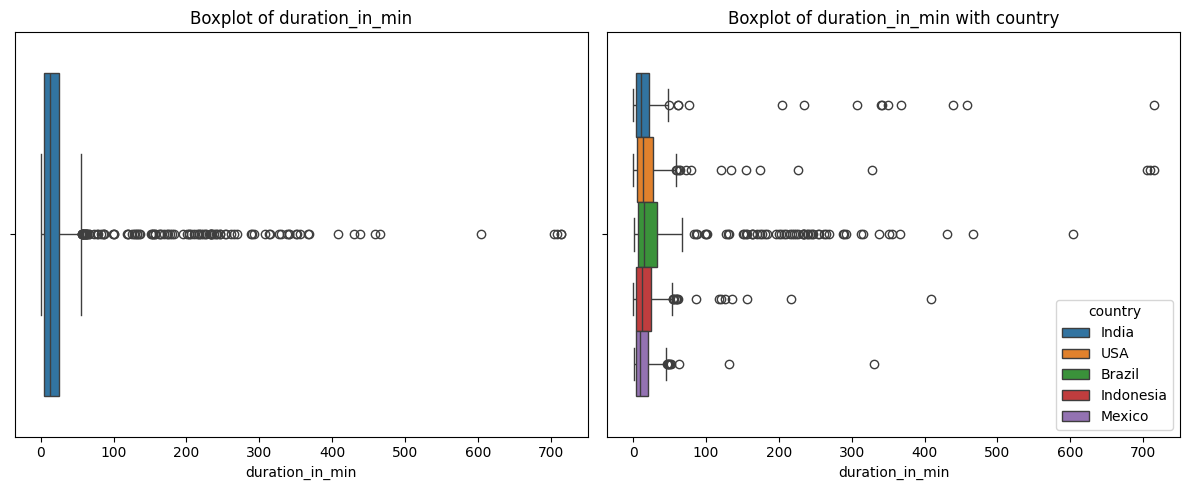

----------------------------------- 

views


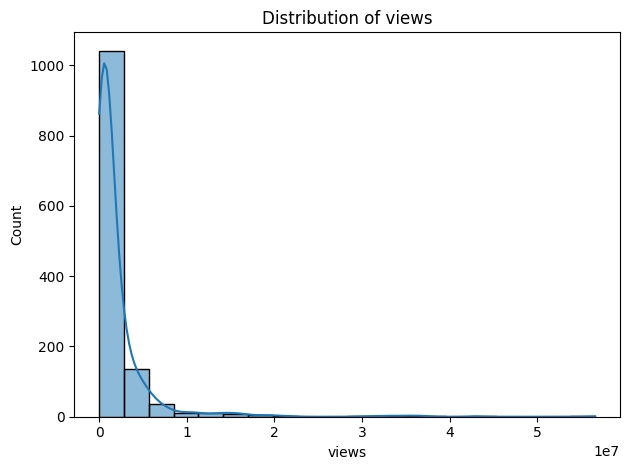

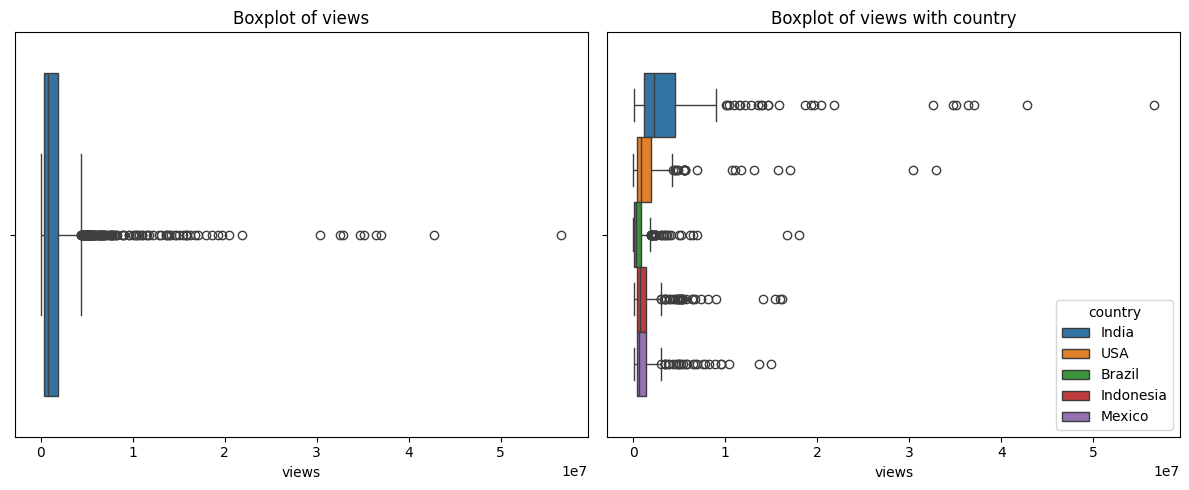

----------------------------------- 

likes


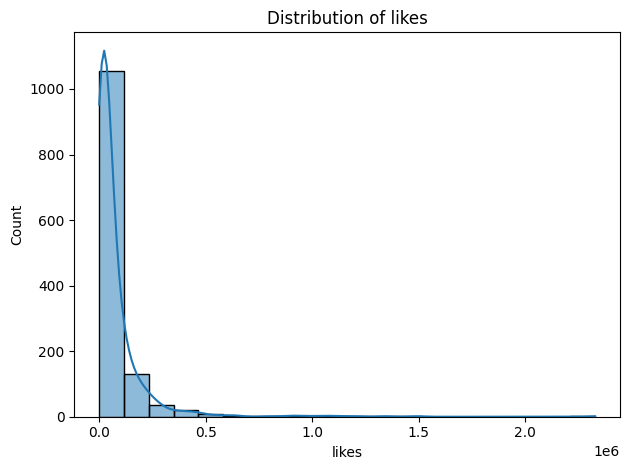

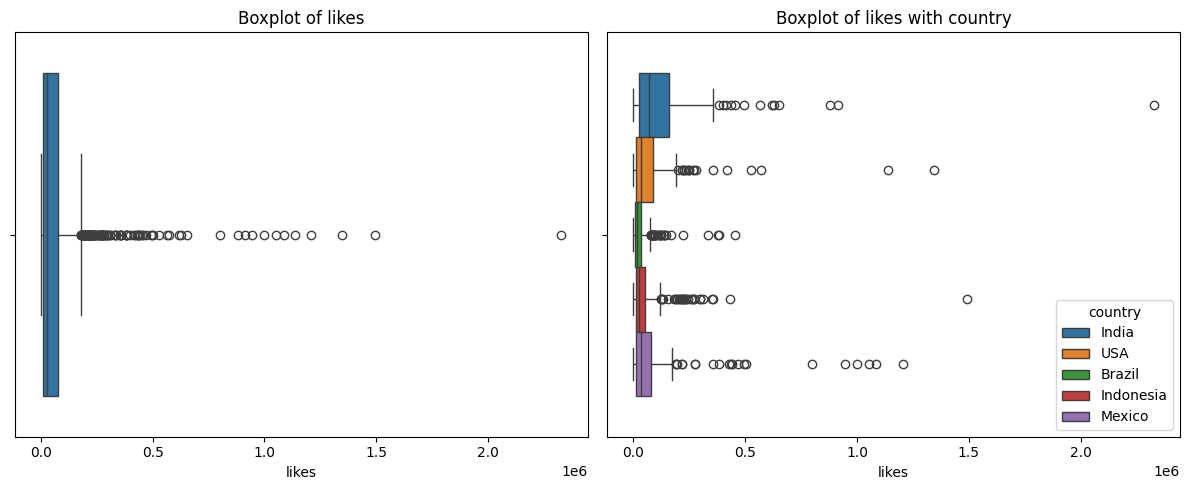

----------------------------------- 

comment_count


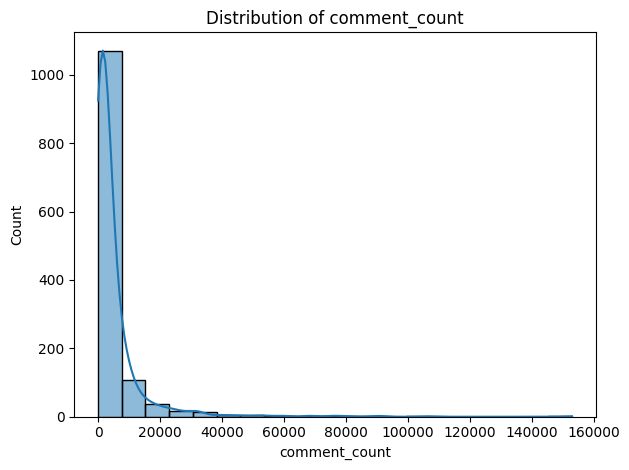

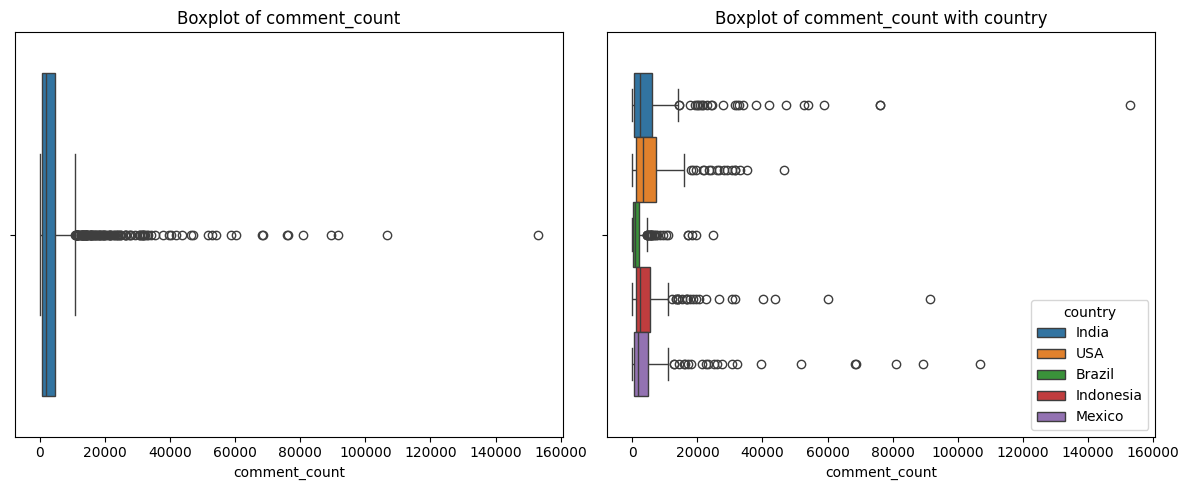

----------------------------------- 



In [63]:
for col in numerical:
    numerical_univariate(df_latest, col, 'country')

##### Some Insights from graphs

For overall data:
- the graphs are extremely right skewed
    - most of the data lies on the lower spectrum with some exceptions on the higher spectrum
- clearly, all the graphs follow quite similar trends

Group by region_code:
- Brazil has largest duration of videos
- Brazil for duration follows the same trend until reaching 100 - 400 min range where it increases again
    - most popular videos remain short videos except some in 100 - 400 min range
- India has most views and likes
    - but for comments it is much more even for all regions
- Brazil has lowest comment_count

#### 2.1.3 Outlier Analysis

- all the numeric columns are heavily skewed to the right
- some outlier analysis can be done to reduce this

- there is a cluster of outliers for videos popular in Brazil.
- analysing what could cause it:

In [64]:
df_latest.loc[(df['region_code'] == 'BR') & ((df['duration_in_min'] >= 100) & (df['duration_in_min'] <= 400)), ['title', 'channel_name', 'category', 'publish_date', 'duration_in_min', 'views', 'likes']]

,title,channel_name,category,publish_date,duration_in_min,views,likes
20,MARCO ASENSIO DOUBLE âš½ï¸âš½ï¸ | ASTON VILL...,Aston Villa Football Club,Sports,2025-02-22,2.90,1828851,35214
21,All Square At Goodison | Everton v Man Utd,Manchester United,Sports,2025-02-22,3.07,1316028,23303
24,JAUH2 KE MAGETAN DEMI MAKAN BEKICOT MAGETAN!!,tanboy kun,Entertainment,2025-02-23,21.40,1415374,27183
70,Andor | Season 2 Trailer | Streaming April 22 ...,Star Wars,Entertainment,2025-02-24,1.60,5653101,132721
71,...But You Also Love Animals? Watch This Video!,Kurzgesagt â€“ In a Nutshell,Education,2025-02-25,15.50,1295510,95285
77,VEIGH - MÃ´naco Freestyle (Clipe Oficial) [Eu ...,VEIGH,Music,2025-02-25,2.27,259319,45079
126,"Briga, sujeira e clientes revoltados: os melho...",Pesadelo na Cozinha,Entertainment,2025-02-26,26.90,115412,2026
220,Cachondos Session #1 (Video Oficial),KevinAMFVEVO,Music,2025-03-01,4.98,515909,34300
270,DE BAR EM BAR 7 - NATANZINHO LIMA - AUDIOVISUA...,Natanzinho Lima Oficial,Music,2025-03-03,38.27,612261,20078
271,Beija-Flor 2025 Ao Vivo | InÃ­cio de Desfile (...,Samba Ã© PaixÃ£o,Music,2025-03-04,9.07,138226,1512


- the outliers in duration of videos in Brazil is due to live sports matches

In [65]:
# checking mean and median
for col in numerical:
    print(f"Mean of {col} is {df_latest[col].mean()}")
    print(f"Median of {col} is {df_latest[col].median()}")
    print()

Mean of duration_in_min is 31.319659540775934
Median of duration_in_min is 12.53

Mean of views is 1971719.1670625494
Median of views is 740444.0

Mean of likes is 72921.89865399842
Median of likes is 28666.0

Mean of comment_count is 4910.222486144101
Median of comment_count is 1866.0



- all the numerical columns have mean larger than median
- but the difference is especially significant for views and likes
- this implies mean in this data set should not be used blindly for analysis

In [66]:
for col in numerical:
    print(col)
    print(f"Max: {df_latest[col].max()}")
    print(f"Min: {df_latest[col].min()}")
    print()

duration_in_min
Max: 715.0
Min: 0.28

views
Max: 56602682
Min: 20125

likes
Max: 2328540
Min: 0

comment_count
Max: 153045
Min: 0



- as the data was collected country-wise, it makes sense to remove outliers for each country to get accurate results
- if we dont remove outliers country-wise, only videos from large countries like India and USA would be removed making the data biased

In [67]:
def remove_outliers(df, col, region_code=None):
    if region_code:
        q1 = df.loc[(df['region_code'] == region_code), col].quantile(0.25)
        q3 = df.loc[(df['region_code'] == region_code), col].quantile(0.75)
    else:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


- creating new dataframe- with no outliers

In [68]:
df_clean = df_latest.copy()

for col in numerical:
   for country in ['IN', 'US', 'BR', 'ID', 'MX']:
        df_clean = remove_outliers(df_clean, col, region_code=country)

In [69]:
for col in numerical:
    print(f"Mean of {col} is {df_clean[col].mean()}")
    print(f"Median of {col} is {df_clean[col].median()}")
    print()

Mean of duration_in_min is 13.319237472766885
Median of duration_in_min is 11.35

Mean of views is 375870.63180827885
Median of views is 274430.0

Mean of likes is 12107.760348583877
Median of likes is 9096.0

Mean of comment_count is 753.3289760348584
Median of comment_count is 712.0



In [70]:
df_clean.describe()

,index,views,likes,comment_count,duration_in_min
count,459.00,459.00,459.00,459.00,459.00
mean,867.88,"375,870.63","12,107.76",753.33,13.32
std,529.05,"301,612.77","9,836.90",488.11,9.84
min,6.00,"20,125.00",0.00,0.00,0.28
25%,400.50,"152,054.00","4,965.00",323.00,4.30
50%,844.00,"274,430.00","9,096.00",712.00,11.35
75%,"1,317.50","503,322.50","16,936.00","1,115.50",19.25
max,"1,799.00","1,316,028.00","45,496.00","1,818.00",40.28


duration_in_min


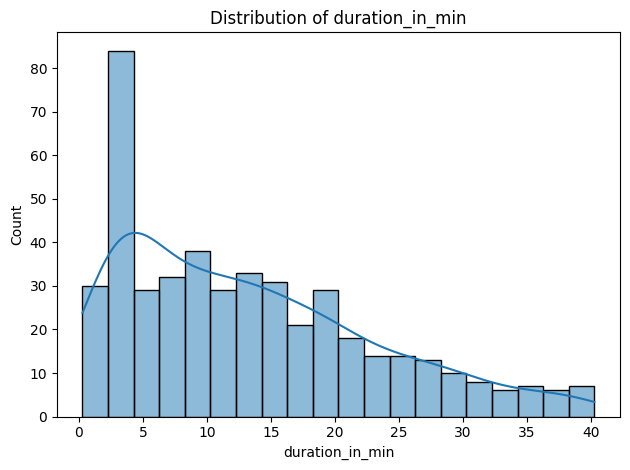

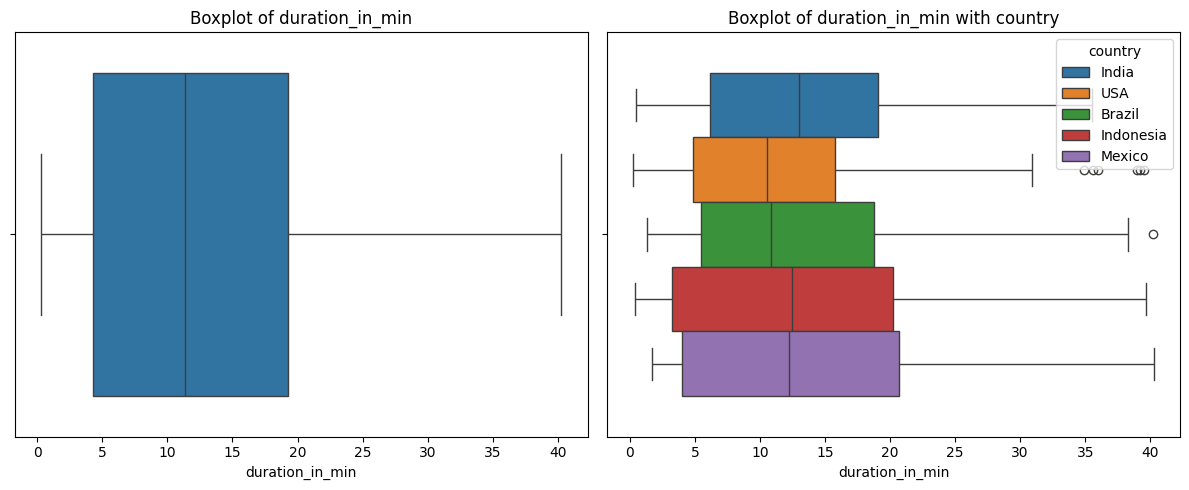

----------------------------------- 

views


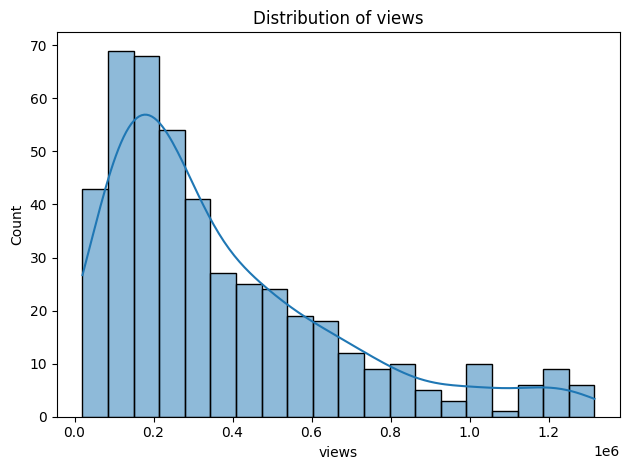

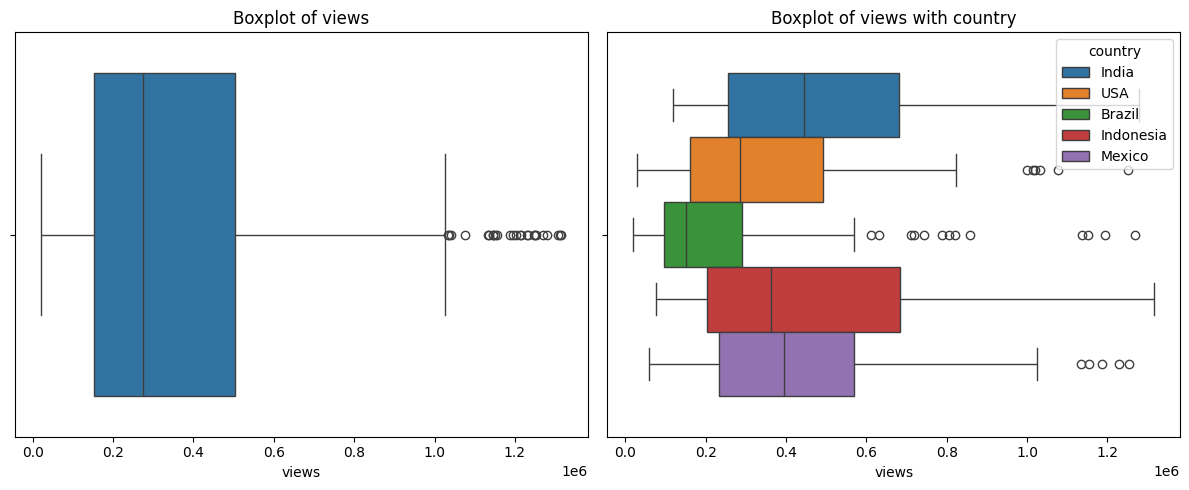

----------------------------------- 

likes


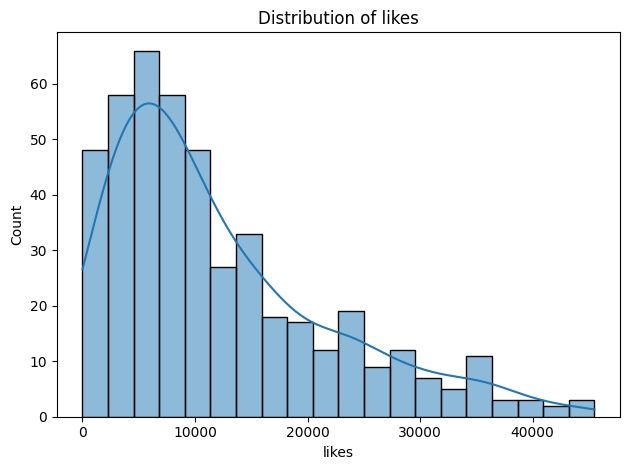

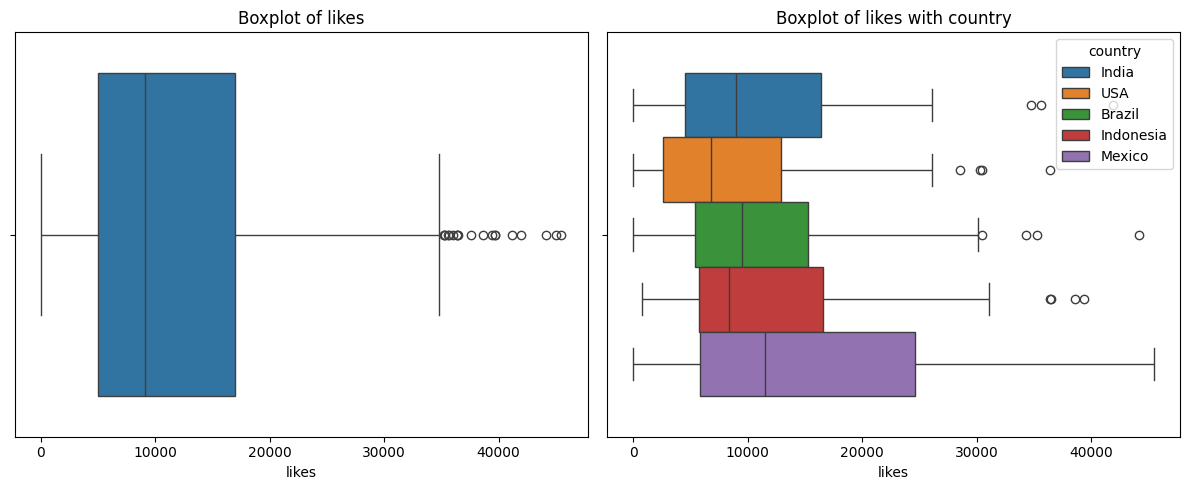

----------------------------------- 

comment_count


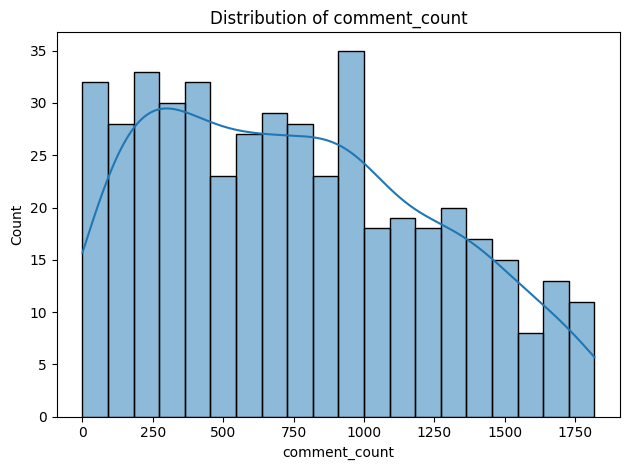

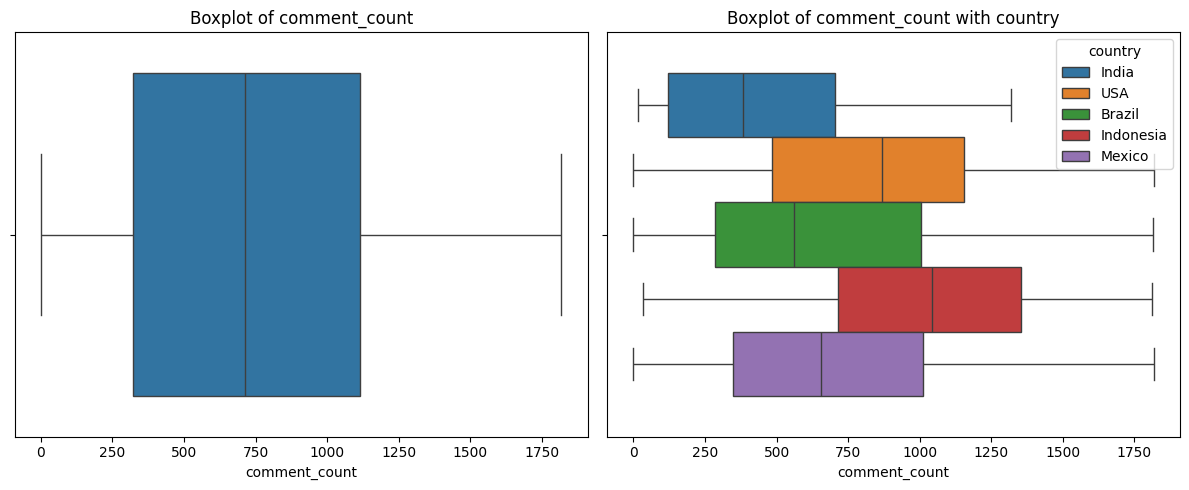

----------------------------------- 



In [71]:
for col in numerical:
    numerical_univariate(df_clean, col, 'country')

- we can see a clearer view of trends in numerical columns now

### 2.2 Bivariate Analysis

In [72]:
for col in numerical:
    print(f'{col} has skew : {df[col].skew()}')

duration_in_min has skew : 5.714763192047082
views has skew : 5.359740125208514
likes has skew : 4.463185280515829
comment_count has skew : 4.424136516990182


#### 2.2.1 Numerical vs Numerical

In [ ]:
# making a dataframe with only numerical columns
cols = numerical.copy()
cols.append('country')
df1 = df_latest[cols] 

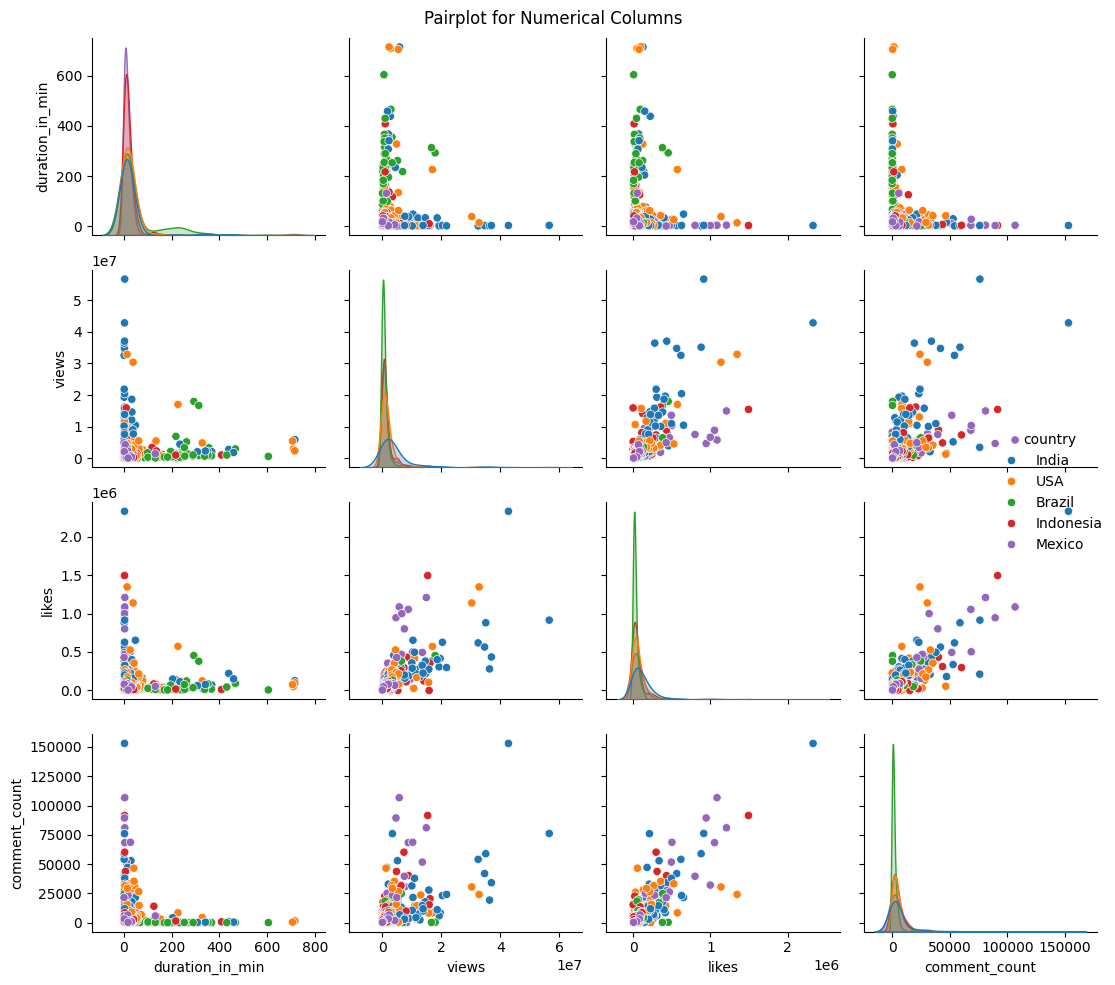

In [76]:
g = sns.pairplot(df1, diag_kind='kde', hue='country')
g.figure.suptitle('Pairplot for Numerical Columns')
plt.tight_layout()
plt.show()

- looking at the correlations of columns in the original dataset (df)

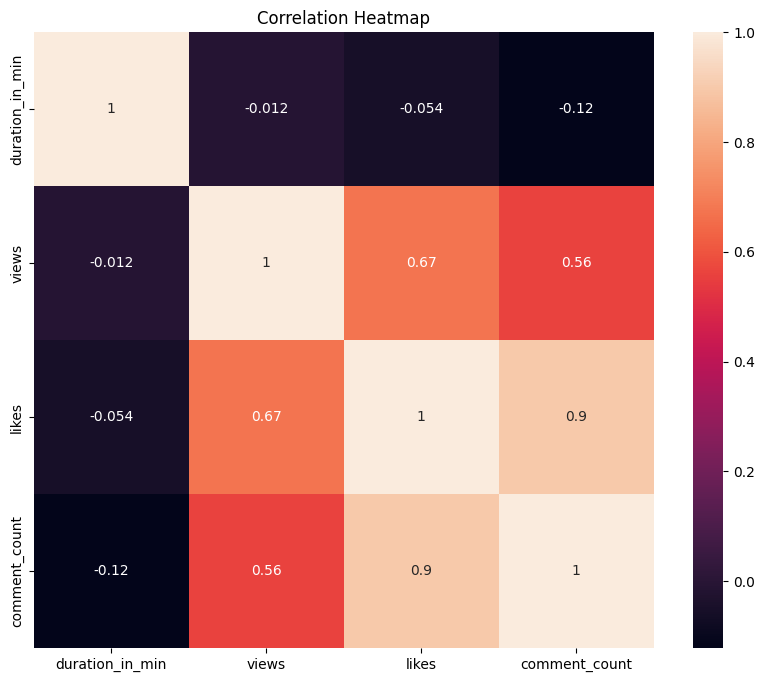

In [77]:
corr_matrix = df[['duration_in_min', 'views', 'likes', 'comment_count']].corr(numeric_only=True)
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True)

plt.title("Correlation Heatmap")
plt.show()

##### Insights
- There is a strong _linear correlation_ between
    - `likes` and `comment_count`  (almost perfect)
    - `views` and `likes` 
    - `views` and `comment_count` 

- There are clusters of outliers
    - Brazil in duration_in_min

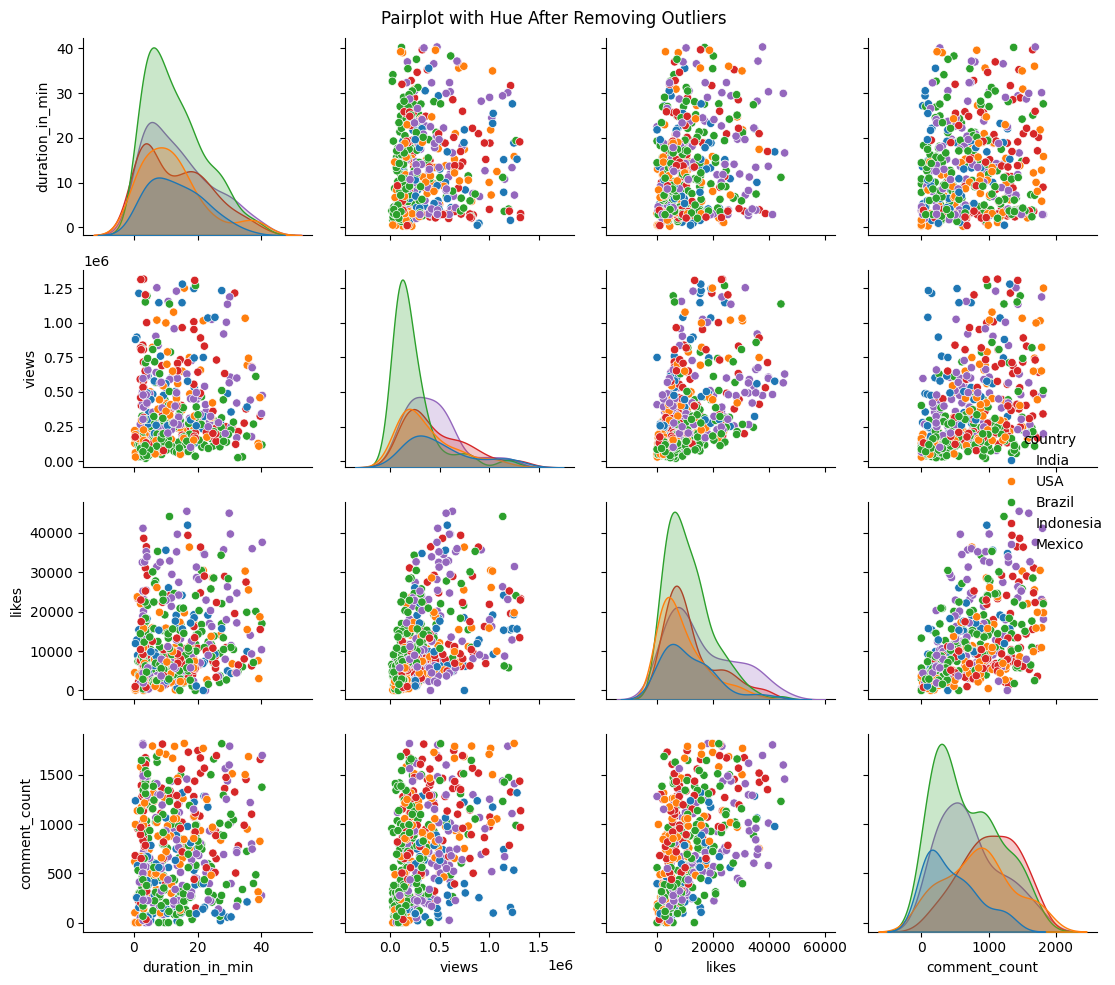

In [ ]:
df1 = df_clean[cols] # dataframe of numerical columns for cleaned dataframe

g = sns.pairplot(df1, diag_kind='kde', hue='country')
g.figure.suptitle('Pairplot with Hue After Removing Outliers')
plt.tight_layout()
plt.show()

- the cleaned version looks very messy.
- it seems that the correlation reduced, but it is probably because there are too many values which makes it difficult to make out any patterns
- lets look at the graphs for each country to see the patterns better

- we have already established that duration doesnt have much correlation- so we drop that column in df1

In [79]:
df1 = df1.drop(columns='duration_in_min')

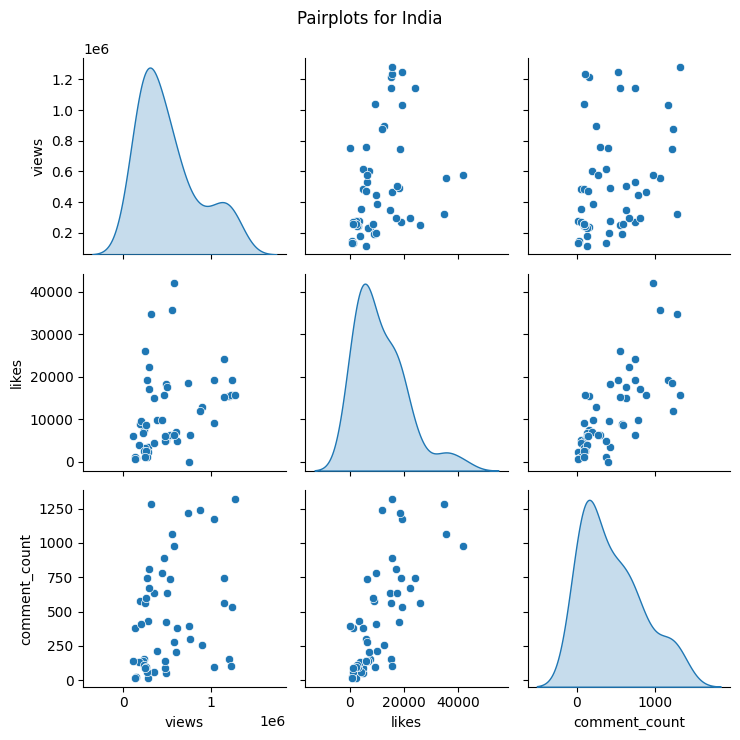

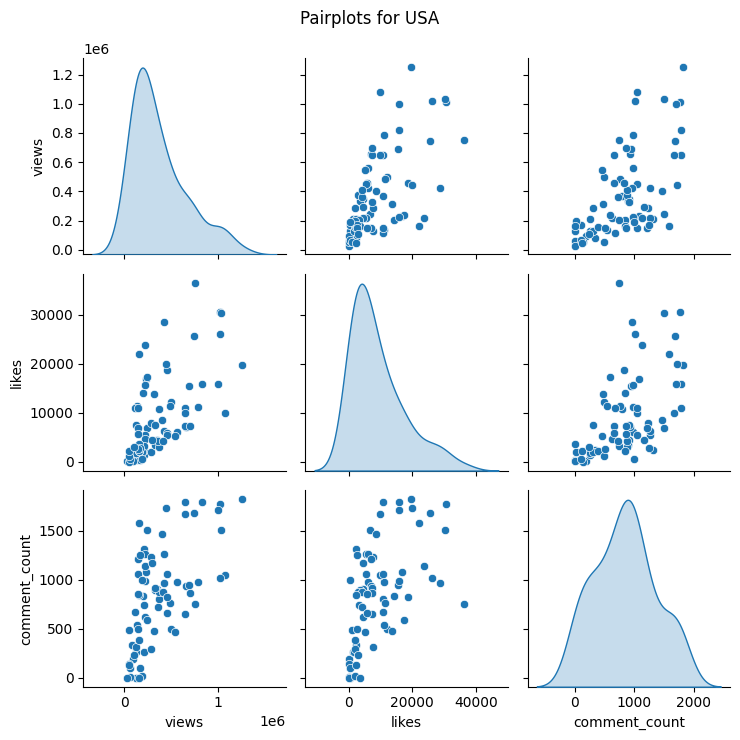

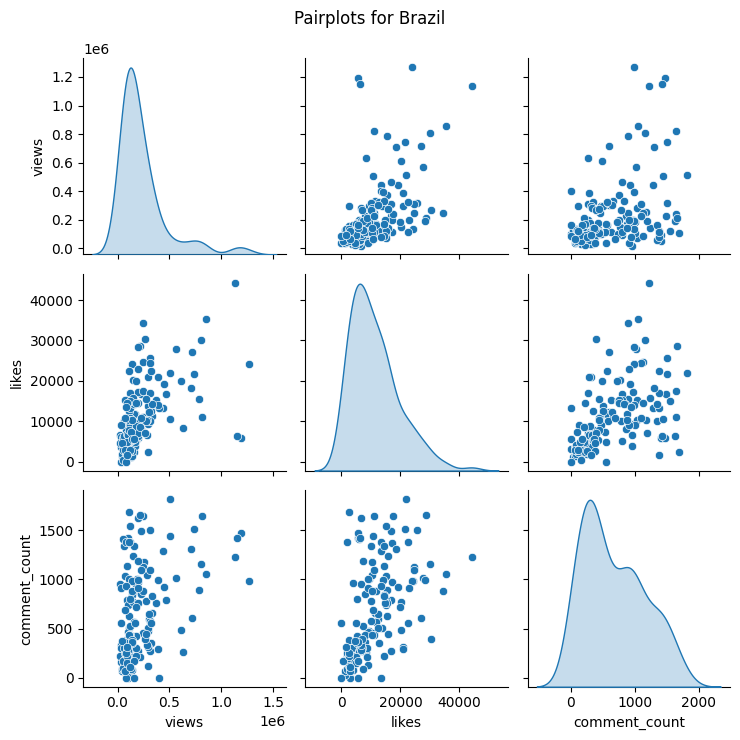

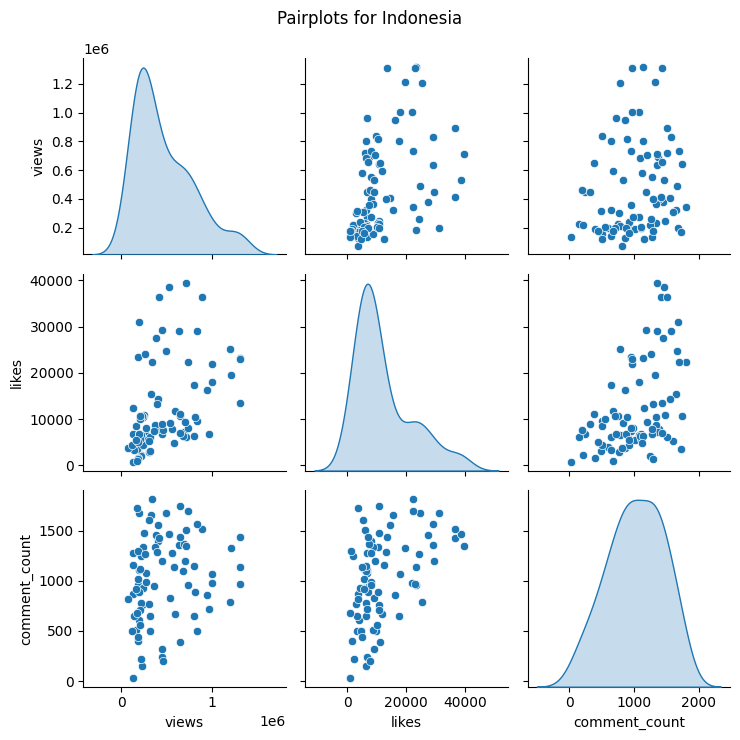

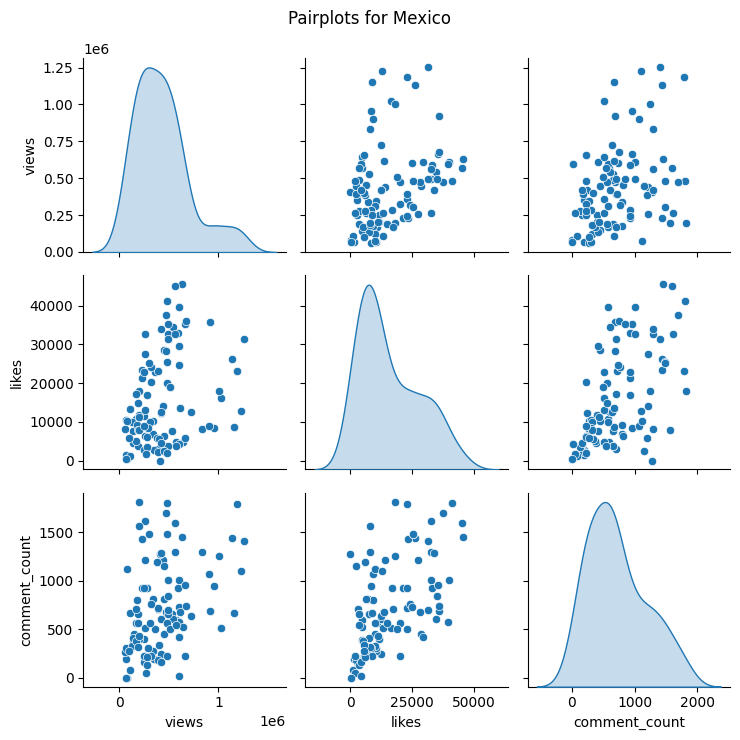

In [81]:
for country in ['India', 'USA', 'Brazil', 'Indonesia', 'Mexico']:
    g = sns.pairplot(df1[(df1.country == country)], diag_kind='kde')
    g.figure.suptitle('Pairplots for ' + country)
    plt.tight_layout()
    plt.show()

##### 2.2.2 Numerical vs Categorical

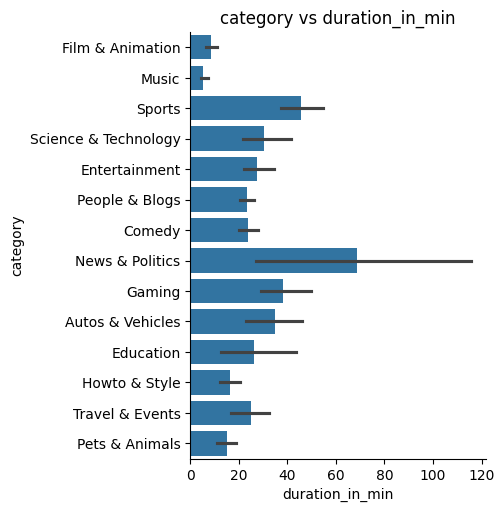

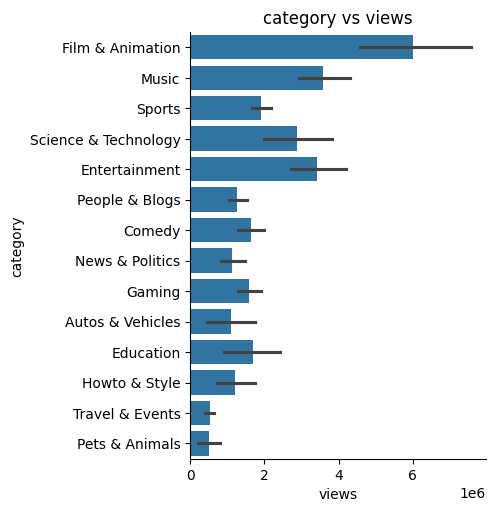

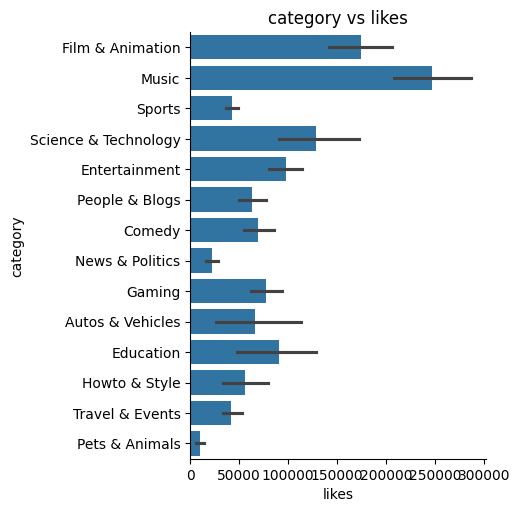

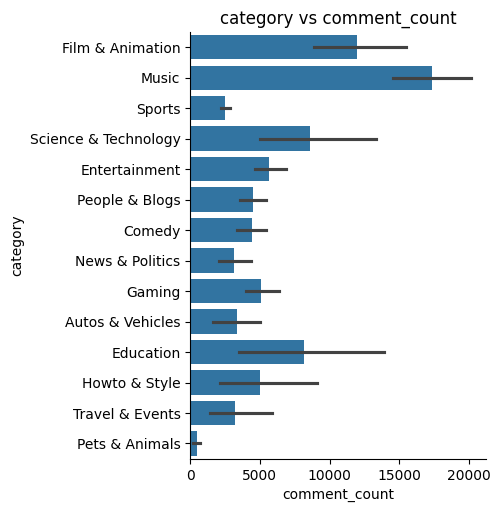

In [82]:
for x in numerical:
    sns.catplot(data=df, x=x, y='category', kind='bar')
    plt.title('category vs ' + x)
    plt.show()

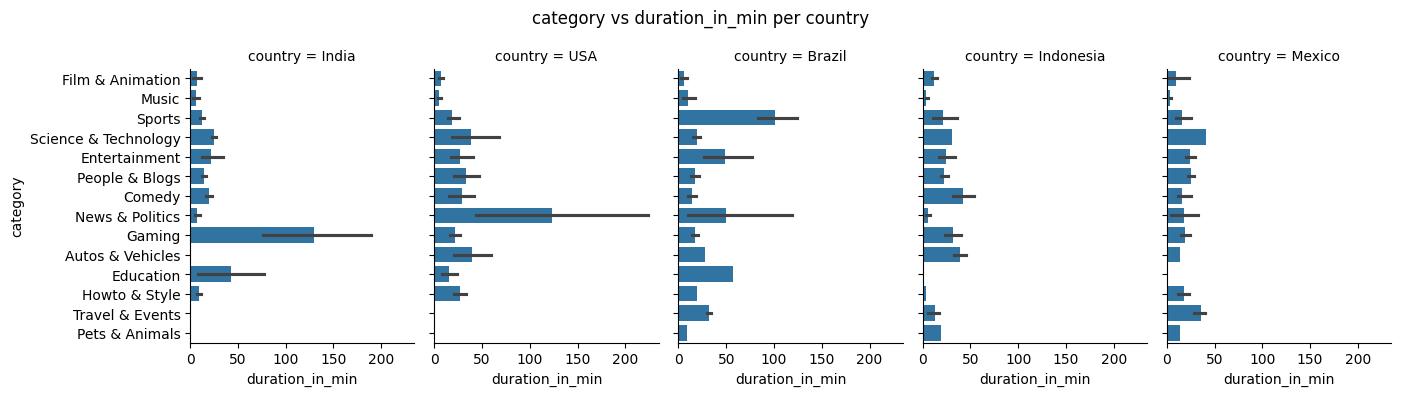

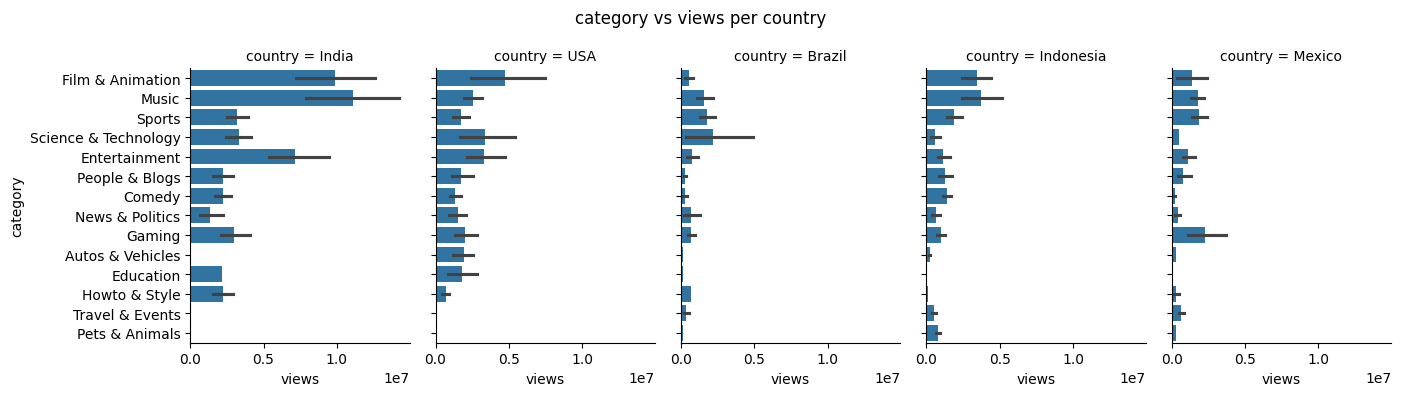

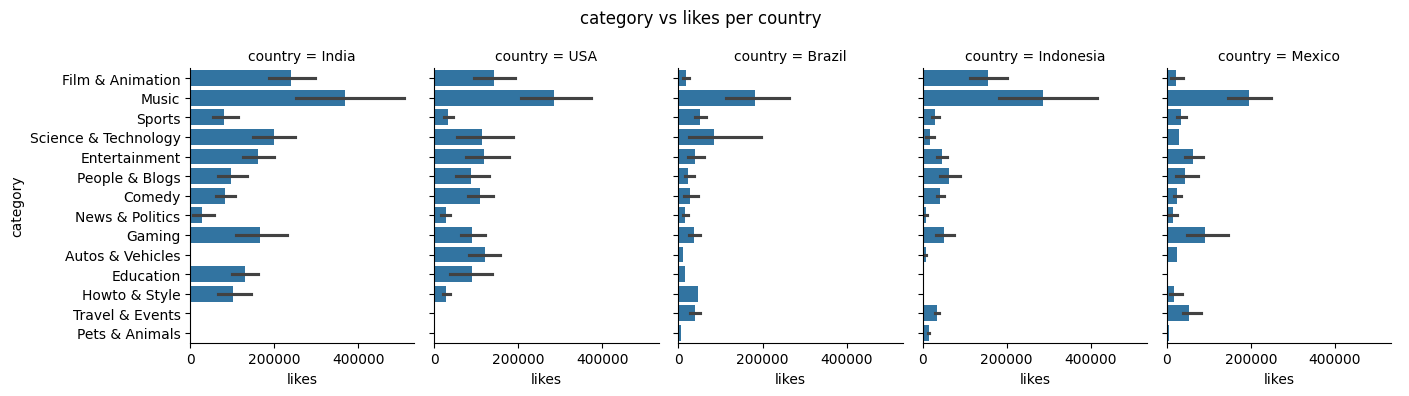

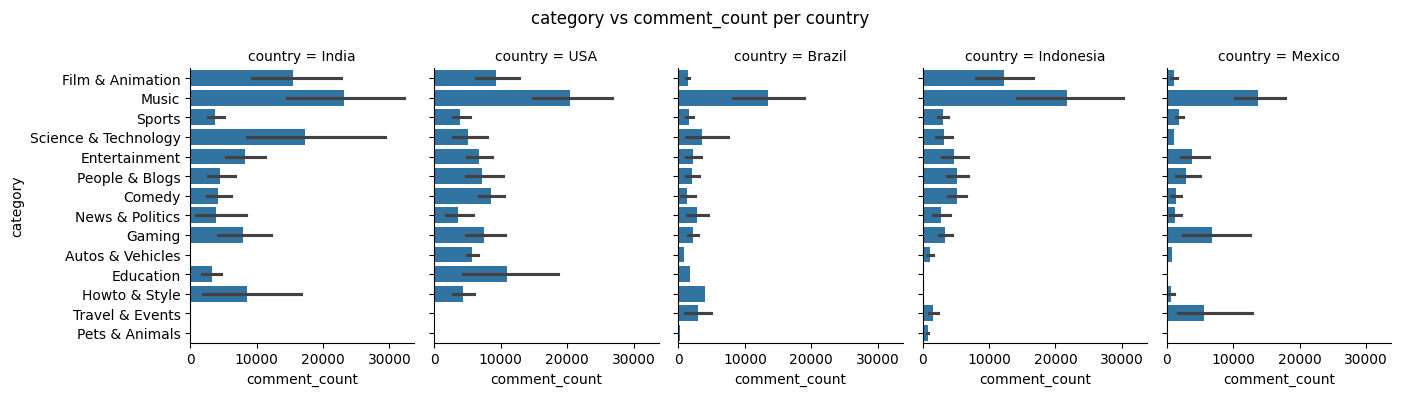

In [83]:
for x in numerical:
    g = sns.catplot(data=df, x=x, y='category', kind='bar', col='country', height=4, aspect=0.7)
    g.figure.suptitle('category vs ' + x + ' per country')
    plt.tight_layout()
    plt.show()

##### Insights

- duration_in_min
    - in India, significantly long popular videos are from Gaming and Education
    - in Brazil, significantly long popular videos are from Sports and Gaming
- views
    - in India, Music and 'Film and Animation' get the highest views even though they have the lowest duration 

### 3. Daily Snapshot Analysis

In [84]:
df.groupby(['collected_date', 'region_code'])['views'].mean()

collected_date             region_code
2025-02-24 00:00:00+00:00  BR              949,620.20
                           ID            1,238,048.90
                           IN            5,551,852.40
                           MX            2,071,293.30
                           US            3,223,188.00
                                             ...     
2025-04-03 00:00:00+00:00  BR            1,298,004.70
                           ID            1,356,728.80
                           IN            4,399,399.30
                           MX            2,102,003.60
                           US            2,808,344.70
Name: views, Length: 180, dtype: float64

In [85]:
# Mean views / likes / comments / duration for each date and region
df['views_per_day'] = df.groupby(['collected_date', 'region_code'])['views'].transform('mean')
df['likes_per_day'] = df.groupby(['collected_date', 'region_code'])['likes'].transform('mean')
df['comment_count_per_day'] = df.groupby(['collected_date', 'region_code'])['comment_count'].transform('mean')
df['duration_in_min_per_day'] = df.groupby(['collected_date', 'region_code'])['duration_in_min'].transform('mean')

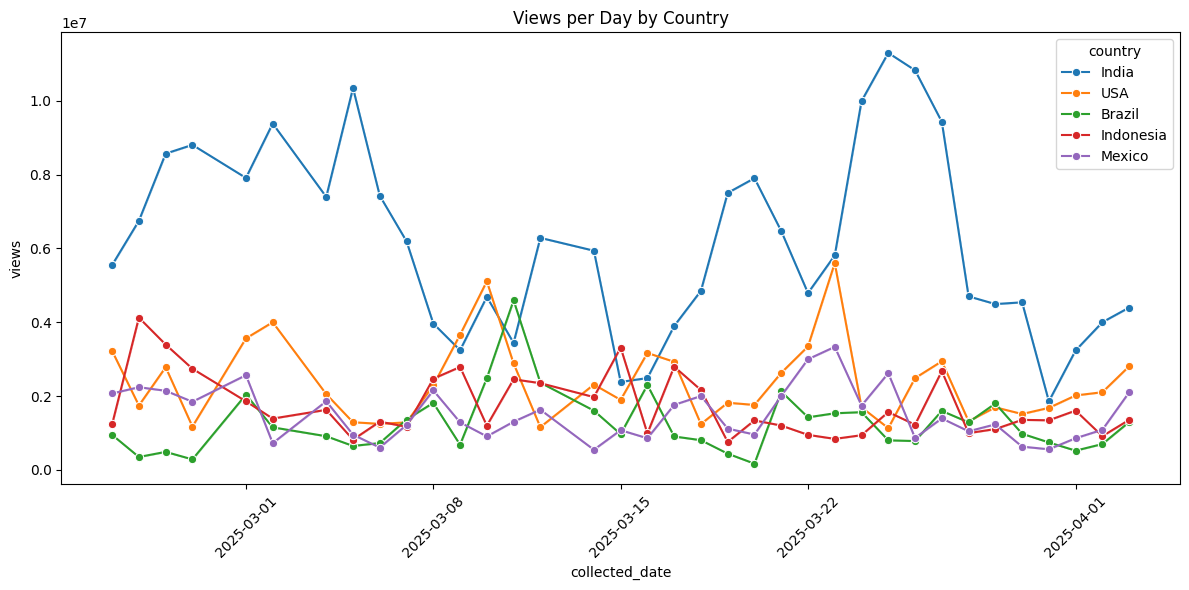

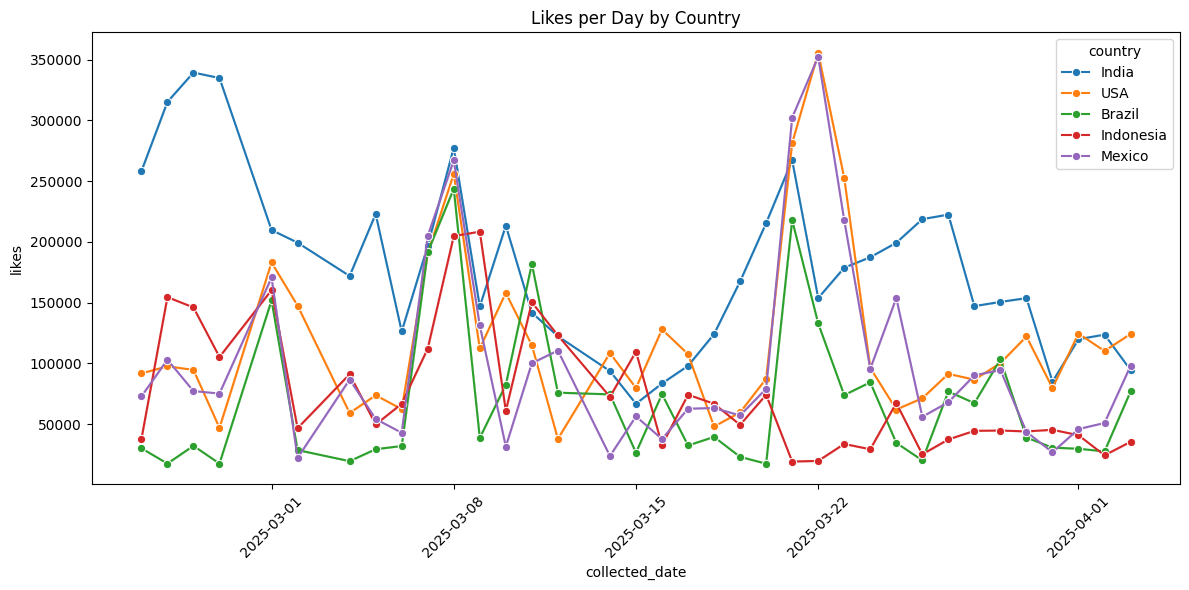

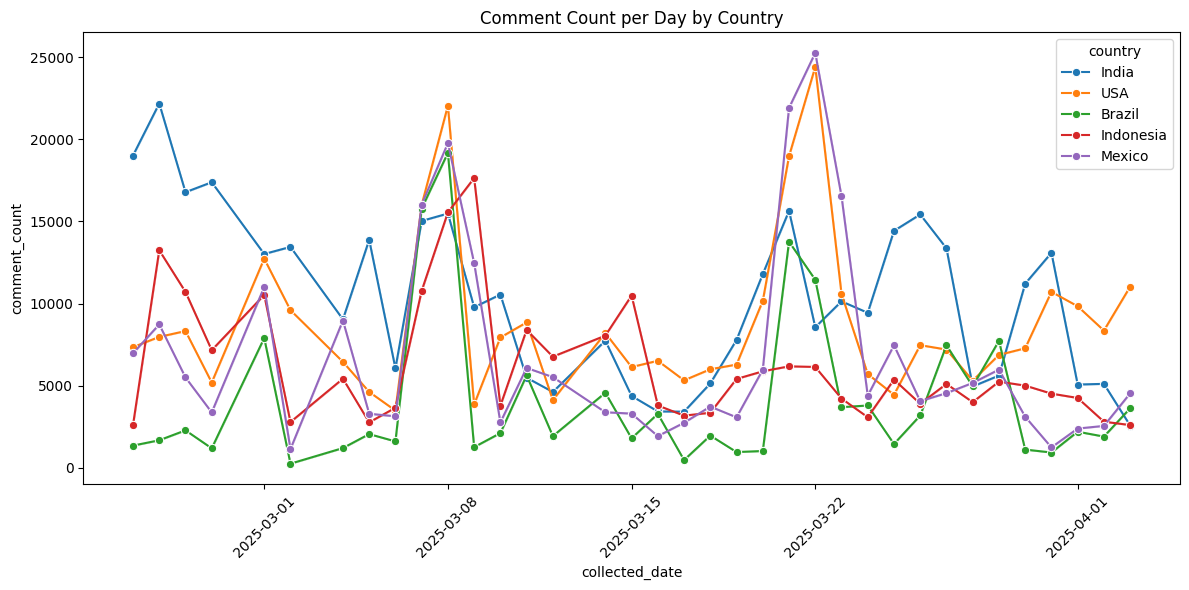

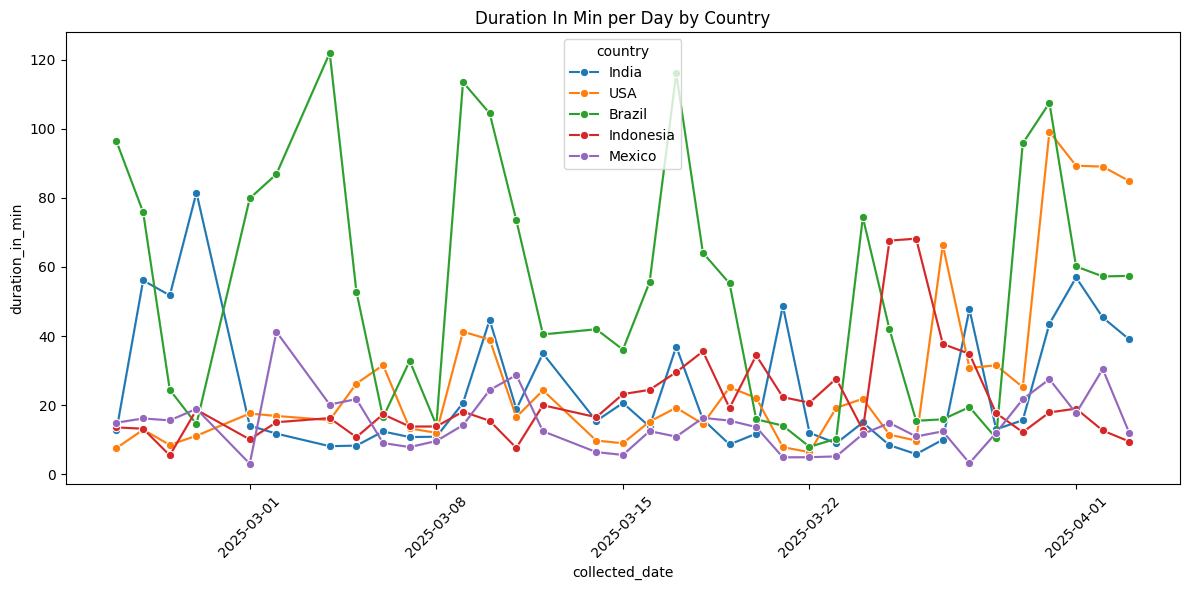

In [86]:
for col in ['views_per_day', 'likes_per_day', 'comment_count_per_day', 'duration_in_min_per_day']:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='collected_date', y=col, hue='country', marker='o')

    plt.title(col.replace('_per_day', ' ').replace('_', ' ').title() + 'per Day by Country')
    plt.xlabel('collected_date')
    plt.ylabel(col.replace('_per_day', ''))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### Insights
- India has significantly more views than other countries- however there are some days with dips in views
- Brazil has significantly more longer duration of videos than other countries- however there are some days with dips in views
    - we discussed previously that these are live sports matches
- it seems whenever there is a dip in duration of videos, there is a peak in the number of likes and comments 
    - videos with less duration are more likely to get more likes and comments
    - however views dont show such trends

### 4. Most repeated videos

In [96]:
repeat_counts = df['id'].value_counts()
df['repeat_count'] = df['id'].map(repeat_counts)

# Top persistent videos
df[df['repeat_count'] > 1][['id', 'title', 'repeat_count', 'category']].drop_duplicates().sort_values(by='repeat_count', ascending=False).head(20)

,id,title,repeat_count,category
460,JSFG-IE8n_c,JENNIE - like JENNIE (Official Video),9,Music
456,kW1e8NtdW90,j-hope â€˜Sweet Dreams (feat. Miguel)â€™ Offic...,9,Music
1109,ECqGCH1TfLY,j-hope â€˜MONA LISAâ€™ Official MV,7,Music
1060,OA3KsYPhZbw,Cazzu - CON OTRA (Official Video),7,Music
860,md9-jG4RzXs,Race Highlights | 2025 Australian Grand Prix,7,Sports
109,Z0vsD8J-0_4,HIGHLIGHTS | FC BARCELONA 4 vs 4 ATLETICO MADR...,6,Sports
61,o9DhvbqYzns,G-DRAGON - TOO BAD (feat. Anderson .Paak) (Off...,6,People & Blogs
663,seARsMwjbEU,JENNIE & Dua Lipa - Handlebars (Official Video),6,Music
1213,Hml6MaRRkn8,Race Highlights | 2025 Chinese Grand Prix,5,Sports
1110,j-RpvIuazmc,"Stromae, Pomme - â€œMa Meilleure Ennemieâ€ (f...",5,Music


- lets look at when and how the videos repeated

In [97]:
# JENNIE - like JENNIE (Official Video
df_repeat = df[(df['id'] == 'JSFG-IE8n_c')]
df_repeat = df_repeat[['region_code', 'collected_date', 'views']]

df_repeat

,region_code,collected_date,views
460,US,2025-03-07 00:00:00+00:00,6196140
470,BR,2025-03-07 00:00:00+00:00,6196140
491,MX,2025-03-07 00:00:00+00:00,6196140
509,IN,2025-03-08 00:00:00+00:00,11400592
513,US,2025-03-08 00:00:00+00:00,11400592
526,BR,2025-03-08 00:00:00+00:00,11400592
530,ID,2025-03-08 00:00:00+00:00,11400592
542,MX,2025-03-08 00:00:00+00:00,11400592
584,ID,2025-03-09 00:00:00+00:00,15447681


In [98]:
# j-hope â€˜Sweet Dreams (feat. Miguel)
df_repeat = df[(df['id'] == 'kW1e8NtdW90')]
df_repeat = df_repeat[['region_code', 'collected_date', 'views']]

df_repeat

,region_code,collected_date,views
456,IN,2025-03-07 00:00:00+00:00,2459709
462,US,2025-03-07 00:00:00+00:00,2459709
471,BR,2025-03-07 00:00:00+00:00,2459709
482,ID,2025-03-07 00:00:00+00:00,2462926
490,MX,2025-03-07 00:00:00+00:00,2462926
518,US,2025-03-08 00:00:00+00:00,4444564
528,BR,2025-03-08 00:00:00+00:00,4444976
540,MX,2025-03-08 00:00:00+00:00,4444976
599,MX,2025-03-09 00:00:00+00:00,5808392


In [99]:
# j-hope â€˜MONA LISAâ€™ Official MV
df_repeat = df[(df['id'] == 'ECqGCH1TfLY')]
df_repeat = df_repeat[['region_code', 'collected_date', 'views']]

df_repeat

,region_code,collected_date,views
1109,IN,2025-03-21 00:00:00+00:00,2807491
1111,US,2025-03-21 00:00:00+00:00,2807491
1121,BR,2025-03-21 00:00:00+00:00,2807491
1143,MX,2025-03-21 00:00:00+00:00,2807491
1162,US,2025-03-22 00:00:00+00:00,4704127
1174,BR,2025-03-22 00:00:00+00:00,4704127
1195,MX,2025-03-22 00:00:00+00:00,4704127


- all these videos trended in 4 or 5 countries for atleast one day
- they all have category = music

In [100]:
# Race Highlights | 2025 Australian Grand Prix
df_repeat = df[(df['id'] == 'md9-jG4RzXs')]
df_repeat = df_repeat[['region_code', 'collected_date', 'views']]

df_repeat

,region_code,collected_date,views
860,US,2025-03-16 00:00:00+00:00,5518107
870,BR,2025-03-16 00:00:00+00:00,5518107
890,MX,2025-03-16 00:00:00+00:00,5518107
913,US,2025-03-17 00:00:00+00:00,8735801
939,ID,2025-03-17 00:00:00+00:00,8735801
942,MX,2025-03-17 00:00:00+00:00,8736079
992,MX,2025-03-18 00:00:00+00:00,9585864


- this video trended for 4 days but not in as many countries
- category = sports

### 5. Top 10 Analysis

In [101]:
pd.set_option('display.max_colwidth', 100)

In [102]:
# Top 10 videos by Views
df_latest[['region_code', 'title', 'category', 'views']].sort_values('views', ascending=False).head(10)

,region_code,title,category,views
986,IN,"SIKANDAR Official Trailer - Salman Khan, Rashmika | Sajid Nadiadwala | A.R. Murugadoss | 30th March",Entertainment,56602682
101,IN,MANIAC (Official Video): YO YO HONEY SINGH | ESHA GUPTA | GLORY | BHUSHAN KUMAR,Music,42787778
754,IN,"Sikandar Naache | Sikandar | Salman Khan & Rashmika Mandanna | JAM8, Amit Mishra, AKASA, Siddhaa...",Music,37015287
546,IN,Bam Bam Bhole | Sikandar | Salman Khan & Rashmika Mandanna | Pritam | Shaan & Dev Negi,Music,36396315
253,IN,Good Bad Ugly Tamil Teaser | Ajith Kumar | Trisha | Adhik Ravichandran | Mythri Movie Makers,Entertainment,35108471
336,IN,"Zohra Jabeen | Sikandar | Salman Khan, Rashmika| Pritam|Nakash, Dev, Mellow D| Sajid N|AR Muruga...",Music,34724863
853,US,I Survived The 5 Deadliest Places On Earth,Entertainment,32866162
183,IN,"SIKANDAR Official Film Teaser - Salman Khan, Rashmika | Sajid Nadiadwala | A.R. Murugadoss | EID...",Entertainment,32531502
194,US,"100 People, 100 Circles, 1 $500,000 Winner",Entertainment,30363892
952,IN,KESARI CHAPTER 2 - OFFICIAL TEASER | Akshay Kumar | R. Madhavan | Ananya | Karan S Tyagi | 18 April,Film & Animation,21845810


In [103]:
# Top 10 videos by Likes
df_latest[['region_code', 'title', 'category', 'likes']].sort_values('likes', ascending=False).head(10)

,region_code,title,category,likes
101,IN,MANIAC (Official Video): YO YO HONEY SINGH | ESHA GUPTA | GLORY | BHUSHAN KUMAR,Music,2328540
418,ID,JENNIE - like JENNIE (Official Video),Music,1493191
853,US,I Survived The 5 Deadliest Places On Earth,Entertainment,1345524
879,MX,Cazzu - CON OTRA (Official Video),Music,1207810
194,US,"100 People, 100 Circles, 1 $500,000 Winner",Entertainment,1137219
429,MX,j-hope â€˜Sweet Dreams (feat. Miguel)â€™ Official MV,Music,1085898
175,MX,LISA - FUTW (Vixi Solo Version) (Official Music Video),Music,1053723
844,MX,"Stromae, Pomme - â€œMa Meilleure Ennemieâ€ (from Arcane Season 2) [Official Music Video]",Music,998797
842,MX,j-hope â€˜MONA LISAâ€™ Official MV,Music,945174
986,IN,"SIKANDAR Official Trailer - Salman Khan, Rashmika | Sajid Nadiadwala | A.R. Murugadoss | 30th March",Entertainment,913949


In [104]:
# Top 10 videos by Comments
df_latest[['region_code', 'title', 'category', 'comment_count']].sort_values('comment_count', ascending=False).head(10)

,region_code,title,category,comment_count
101,IN,MANIAC (Official Video): YO YO HONEY SINGH | ESHA GUPTA | GLORY | BHUSHAN KUMAR,Music,153045
429,MX,j-hope â€˜Sweet Dreams (feat. Miguel)â€™ Official MV,Music,106712
418,ID,JENNIE - like JENNIE (Official Video),Music,91524
842,MX,j-hope â€˜MONA LISAâ€™ Official MV,Music,89388
879,MX,Cazzu - CON OTRA (Official Video),Music,81013
986,IN,"SIKANDAR Official Trailer - Salman Khan, Rashmika | Sajid Nadiadwala | A.R. Murugadoss | 30th March",Entertainment,76154
1116,IN,"The Bhootnii (Official Trailer) | Sanjay D, Mouni R, Sunny S , Palak T, Nick | Sidhaant S | Deep...",Film & Animation,75987
252,MX,ENTRÃ‰ AL TÃšNEL DE BETA,Entertainment,68604
175,MX,LISA - FUTW (Vixi Solo Version) (Official Music Video),Music,68289
417,ID,TREASURE - â€˜YELLOWâ€™ M/V,Entertainment,60171


- Music category is clearly dominating all the charts, with Entertainment being second

In [ ]:
### making files for tableau visualizations

df['publish_date_time'] = df['publish_date_time'].dt.tz_localize(None)
df['collected_date'] = df['collected_date'].dt.tz_localize(None)

df_clean['publish_date_time'] = df_clean['publish_date_time'].dt.tz_localize(None)
df_clean['collected_date'] = df_clean['collected_date'].dt.tz_localize(None)

df_latest['publish_date_time'] = df_latest['publish_date_time'].dt.tz_localize(None)
df_latest['collected_date'] = df_latest['collected_date'].dt.tz_localize(None)

df.to_excel(r'C:\Users\arush\OneDrive\Desktop\youtube_analysis_project\data\processed\full_data.xlsx', index=False)
df_clean.to_excel(r'C:\Users\arush\OneDrive\Desktop\youtube_analysis_project\data\processed\clean_data.xlsx', index=False)
df_latest.to_excel(r'C:\Users\arush\OneDrive\Desktop\youtube_analysis_project\data\processed\latest_data.xlsx', index=False)